**Data Loading & Initial Exploration**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import os

##
from matplotlib.colors import LinearSegmentedColormap
import statsmodels.formula.api as smf

#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [ ]:
plt.style.use('default')


In [4]:
df = pd.read_csv("../data/clean/aggregate_df.csv")

df_customers = pd.read_csv("../data/clean/customers.csv")
df_orders = pd.read_csv("../data/clean/orders.csv")
df_items = pd.read_csv("../data/clean/order_items.csv")
df_products = pd.read_csv("../data/clean/products.csv")

In [ ]:
### reload

#df_orders = pd.read_csv("../data/clean/orders.csv")
#df = pd.read_csv("../data/clean/aggregate_df.csv")

In [5]:
print("=== MAIN DF ===")
df.info()
print("\n=== CUSTOMERS ===")
df_customers.info()
print("\n=== ORDERS ===")
df_orders.info()
print("\n=== ORDER ITEMS ===")
df_items.info()
print("\n=== PRODUCTS ===")
df_products.info()

=== MAIN DF ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.company              4194 non-null   object 
 4   Customers.create_date          4194 non-null   object 
 5   Customers.mailing              4194 non-null   int64  
 6   Customers.last_modified        4194 non-null   object 
 7   Orders.id                      4194 non-null   int64  
 8   Orders.customer_id             4194 non-null   int64  
 9   Orders.company                 730 non-null    object 
 10  Orders.order_number            4194 non-null   object 
 11  Orders.reorder_id              82 non-null     float64
 12  Orders.subtotal                4

In [11]:
#df.head(10)

In [8]:
# # overview of the dataframe
    
# display(
#     "Shape",
#     df.shape,
#     "Description",
#     df.describe().round(2).T,
#     "Duplicates",
#     df.duplicated().sum(),
# )


In [6]:
display(
    "=== CUSTOMERS ===",
    df_customers.describe().round(2).T,
    df_customers.shape,


    "=== ORDERS ===",
    df_orders.describe().round(2).T,
    df_orders.shape,

    "=== ORDER ITEMS ===",
    df_items.describe().round(2).T,
    df_items.shape,


    "=== PRODUCTS ===",
    df_products.describe().round(2).T,
    df_products.shape
    )



'=== CUSTOMERS ==='

,count,mean,std,min,25%,50%,75%,max
Customers.id,3054.0,1899.90,1073.24,3.0,972.25,1926.5,2818.75,3736.0
Customers.mailing,3054.0,0.46,0.50,0.0,0.00,0.0,1.00,1.0


(3054, 7)

'=== ORDERS ==='

,count,mean,std,min,25%,50%,75%,max
Orders.id,3565.0,9036.67,5311.46,23.00,4177.00,9398.00,13973.00,17437.00
Orders.customer_id,3565.0,1793.49,1076.45,3.00,851.00,1751.00,2713.00,3736.00
Orders.reorder_id,63.0,7549.14,3656.41,30.00,4673.00,6887.00,11014.50,16201.00
Orders.subtotal,3565.0,109.82,206.22,2.89,32.63,63.61,124.74,5163.04
Orders.tax,3159.0,0.67,4.10,0.00,0.00,0.00,0.00,132.93
Orders.shipping,3390.0,7.22,4.51,0.00,0.00,9.95,9.95,32.81
Orders.coupon_id,640.0,20.59,11.65,4.00,12.00,26.00,32.00,48.00
Orders.coupon_amount,640.0,9.20,14.51,0.00,1.52,5.00,10.76,109.90
Orders.discount_amount,343.0,13.46,52.82,0.02,3.43,6.71,9.95,588.04
Orders.total,3565.0,115.37,195.56,2.89,39.99,70.74,129.96,4627.95


(3565, 24)

'=== ORDER ITEMS ==='

,count,mean,std,min,25%,50%,75%,max
Order_Items.id,4194.0,11156.07,5802.47,31.00,5847.25,11770.00,16482.75,20202.0
Order_Items.parent,4194.0,9142.98,5276.54,23.00,4258.00,9641.00,14011.75,17437.0
Order_Items.product_id,4151.0,4451.43,5577.39,1.00,1009.00,1867.00,4345.50,26175.0
Order_Items.qty,4194.0,1.86,8.82,1.00,1.00,1.00,1.00,500.0
Order_Items.price,4194.0,67.35,95.57,1.12,24.03,43.46,74.99,1899.0
Order_Items.cost,4194.0,51.09,74.13,0.28,16.20,32.50,59.50,1350.0
Order_Items.reorder_frequency,24.0,1.67,0.92,1.00,1.00,1.00,2.00,4.0


(4194, 8)

'=== PRODUCTS ==='

,count,mean,std,min,25%,50%,75%,max
Products.id,1710.0,6266.13,6393.83,1.00,1324.50,3078.50,11310.00,26175.00
Products.import_id,1710.0,3.83,2.84,1.00,3.00,3.00,4.00,21.00
Products.list_price,1692.0,127.08,333.87,1.02,27.40,58.01,116.38,8439.00
Products.price,1709.0,71.70,124.22,1.54,21.05,39.68,71.72,1899.00
Products.sale_price,146.0,67.43,97.96,2.89,19.03,39.97,69.88,659.99
Products.cost,1710.0,52.65,93.95,0.28,12.50,27.99,53.83,1350.00
Products.case_qty,831.0,181.09,538.76,1.00,1.00,6.00,80.00,5000.00


(1710, 16)

In [7]:
### ---  Column structuring --- 

id_cols = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number', 'Orders.reorder_id',
           'Orders.coupon_id', 'Orders.reorder_id',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id',  'Products.import_id', 'Products.family_id'
        ]		


text_cols = ['Customers.fname', 'Customers.lname', 'Customers.company', 
            'Orders.company', 'Orders.discount_name', 'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.shopping_color'
            ]

integer_cols = ['Customers.mailing', 'Order_Items.qty']


category_cols = ['Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.discount_name',
                'Orders.payment_method', 'Orders.payment_status', 'Orders.status', 
                'Products.status', 'Products.vendor', 'Products.shopping_brand', 'Products.taxable'
                ]

date_cols = ['Orders.placed_date', 'Orders.payment_date', 'Orders.updated_date',
             'Orders.shipped_date', 'Customers.create_date', 'Customers.last_modified'
             ]

In [8]:
dfs = [df, df_orders, df_customers, df_items, df_products]

for data in dfs:
    for col in id_cols:
        if col in data.columns:
            data[col] = data[col].astype("object")

    for col in category_cols:
        if col in data.columns:
            data[col] = data[col].astype("category")

    for col in integer_cols:
        if col in data.columns:
            data[col] = data[col].astype("int64")

    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')



In [17]:
########################################################################################
backup_df = df.copy()
backup_df_orders = df_orders.copy()
backup_df_customers = df_customers.copy()
backup_df_items = df_items.copy()
backup_df_products = df_products.copy()

In [ ]:
#df = backup_df
#df_orders = backup_df_orders
########################################################################################

### **CUSTOMER ANALYTICS**

In [18]:
print("Customers: ", df_customers['Customers.id'].nunique())

business_customers = (df_customers['Customers.company'] != "Individual").sum()
print("Business Customers:", business_customers)

business_company = df_customers['Customers.company'].nunique() - 1 # ohne Individual
print("Business Company: ", business_company)

individual_customers = (df_customers['Customers.company'] == "Individual").sum()
print("Individual Customers:", individual_customers) 

Customers:  3054
Business Customers: 464
Business Company:  428
Individual Customers: 2590


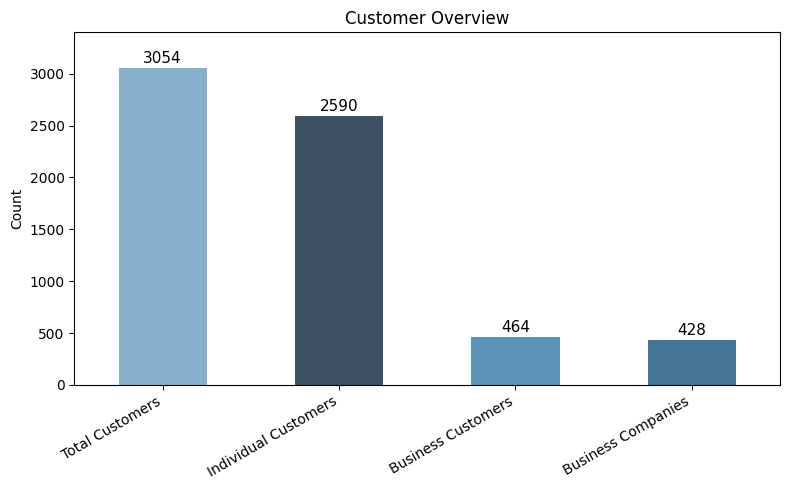

In [10]:
metrics = {
    "Total Customers": df_customers['Customers.id'].nunique(),
    "Business Customers": (df_customers['Customers.company'] != "Individual").sum(),
    "Business Companies": df_customers['Customers.company'].nunique() - 1,
    "Individual Customers": (df_customers['Customers.company'] == "Individual").sum()
}

df_metrics = pd.DataFrame(list(metrics.items()), columns=["Category", "Count"])

# Desired order
order = [
    "Total Customers",
    "Individual Customers",
    "Business Customers",
    "Business Companies"
]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_metrics,
    x="Category",
    y="Count",
    width=0.5,
    hue="Category",
    palette="Blues_d",
    order=order
)

# Add labels
for index, row in df_metrics.set_index("Category").loc[order].iterrows():
    plt.text(order.index(index), row["Count"] + 50, str(row["Count"]),
             ha='center', fontsize=11)

plt.ylim(0, 3400)
plt.title("Customer Overview")
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [12]:
df['is_individual'] = df['Customers.company'] == "Individual"
df['is_business'] = df['Customers.company'] != "Individual"

orders_comp_unique = (
    df
    .drop_duplicates(subset="Orders.id")
    .loc[:, ["Orders.id", "Orders.total", "is_individual", "is_business"]]
)

individual_revenue = orders_comp_unique.loc[orders_comp_unique['is_individual'], 'Orders.total'].sum()
business_revenue   = orders_comp_unique.loc[orders_comp_unique['is_business'], 'Orders.total'].sum()

print(f"Individual revenue: {individual_revenue:,.2f} USD")
print(f"Business revenue: {business_revenue:,.2f} USD")

Individual revenue: 308,740.34 USD
Business revenue: 102,538.42 USD


Individual share: 75.07 %
Business share: 24.93 %


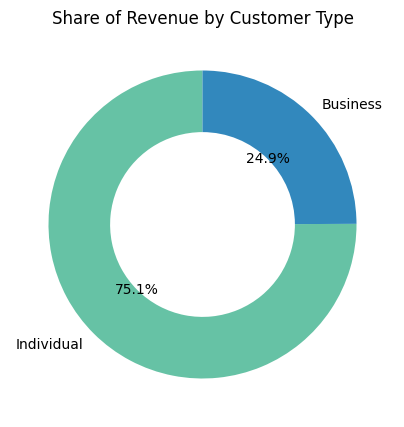

In [ ]:
total_revenue = df_orders['Orders.total'].sum()

print("Individual share:", round((individual_revenue / total_revenue * 100),2), "%")
print("Business share:", round((business_revenue / total_revenue * 100),2), "%")

sizes = [individual_revenue, business_revenue]
labels = ["Individual", "Business"]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=["#66c2a5", "#3288bd"], wedgeprops={'width':0.4})

plt.title("B2B vs B2C distribution ")
plt.show()

In [192]:
# df_customers['is_business'] = df_customers['Customers.company'] != "Individual"

# orders_by_type = (
#     df_orders
#     .merge(
#         df_customers[['Customers.id', 'is_business']],
#         left_on='Orders.customer_id',
#         right_on='Customers.id',
#         how='left'
#     )
#     .groupby('is_business')['Orders.total']
#     .mean()
# )
# customer_counts

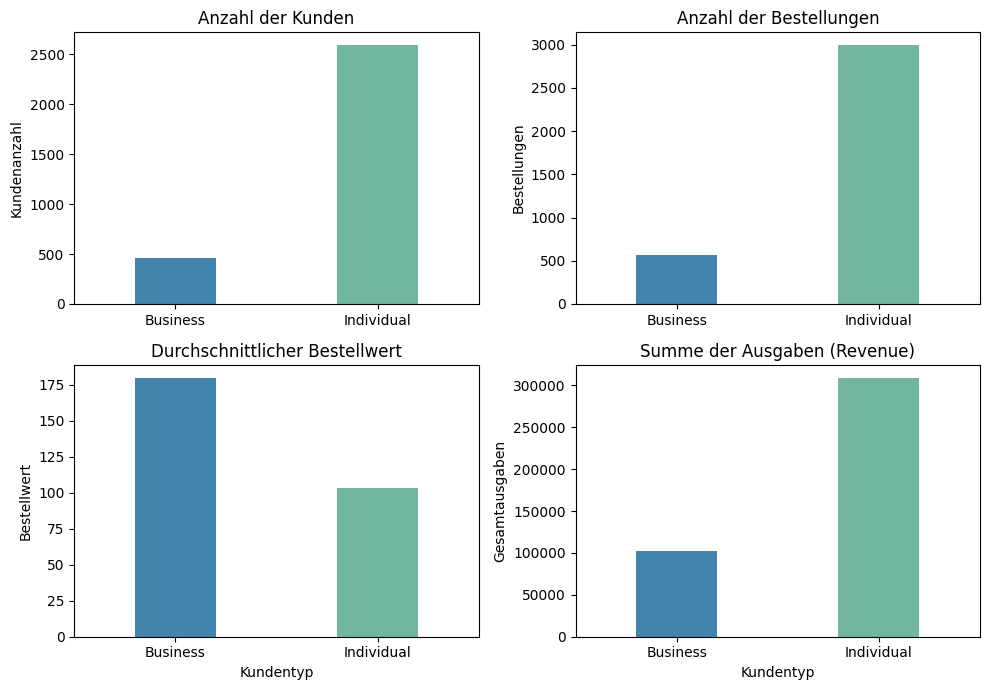

In [361]:
# ==================CUSTOMER DATA========================
df_customers['customer_type'] = np.where(df_customers['Customers.company'] == "Individual","Individual","Business")

customer_counts = df_customers['customer_type'].value_counts().sort_values()
customer_counts = customer_counts.reset_index()
customer_counts.columns = ['customer_type', 'customer_count']

# =================== ORDER DATA =======================

# Join customer type (temporary, for analysis only)
orders_with_type = df_orders.merge(df_customers[['Customers.id', 'is_business']],
    left_on='Orders.customer_id',
    right_on='Customers.id',
    how='left'
)
orders_with_type['customer_type'] = orders_with_type['is_business'].map(arg={False: 'Individual', True: 'Business'})

# ---- Mean order value ----
mean_values = (orders_with_type.groupby('customer_type')['Orders.total'].mean().reset_index())

# ---- Order count ----
order_counts = (orders_with_type.groupby('customer_type')['Orders.id'].count().reset_index(name='order_count'))

# =================== Total spent =======================

total_spent = (orders_with_type.groupby('customer_type')['Orders.total'].sum().reset_index(name='total_spent'))



# =================== PLOT =======================
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# === (1) CUSTOMER COUNT ===
sns.barplot(
    data=customer_counts,
    x='customer_type', y='customer_count',
    hue='customer_type', palette={'Individual': '#66c2a5', 'Business': '#3288bd'},
    legend=False,  width=0.4,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Anzahl der Kunden")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Kundenanzahl")

# === (2) ORDER COUNT ===
sns.barplot(
    data=order_counts,
    x='customer_type', y='order_count',
    hue='customer_type', palette={'Individual': '#66c2a5', 'Business': '#3288bd'},
    legend=False, width=0.4,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Anzahl der Bestellungen")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Bestellungen")

# === (3) MEAN ORDER VALUE ===
sns.barplot(
    data=mean_values,
    x='customer_type', y='Orders.total',
    hue='customer_type', palette={'Individual': '#66c2a5', 'Business': '#3288bd'},
    legend=False, width=0.4,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Durchschnittlicher Bestellwert")
axes[1, 0].set_xlabel("Kundentyp")
axes[1, 0].set_ylabel("Bestellwert")

# === (4) TOTAL SPENT ===
sns.barplot(
    data=total_spent,
    x='customer_type', y='total_spent',
    hue='customer_type', palette={'Individual': '#66c2a5', 'Business': '#3288bd'},
    legend=False, width=0.4,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Summe der Ausgaben (Revenue)")
axes[1, 1].set_xlabel("Kundentyp")
axes[1, 1].set_ylabel("Gesamtausgaben")

plt.tight_layout()
plt.show()

In [32]:
# # --- 1. Усі унікальні компанії ---
# companies = sorted(df['Orders.company'].dropna().unique())
# #companies = df['Orders.company'].dropna().unique()


# # --- 2. Генеруємо кольори ---
# palette = sns.color_palette("tab20c", len(companies))  #   +"tab20"   tab20+sort  tab20c+sort
  
# # --- 3. Створюємо словник: компанія → колір ---
# company_colors = dict(zip(companies, palette))


# # --- 4. Top-10 компаній ---
# top_company_count = df['Orders.company'].value_counts().head(10)
# top_company_total = (
#     df.groupby('Orders.company')['Orders.total']
#       .sum()
#       .sort_values(ascending=False)
#       .head(10)
# )


# # --- 5. Кольори для топ-10 ---
# colors_count = top_company_count.index.map(company_colors).tolist()
# colors_total = top_company_total.index.map(company_colors).tolist()


# # === Візуалізація ===
# plt.figure(figsize=(14, 5))

# # LEFT — COUNT
# plt.subplot(1, 2, 1)
# sns.barplot(
#     x=top_company_count.values,
#     y=top_company_count.index,
#     palette=colors_count
# )
# plt.title("Top 10 Orders.company (Count)")
# plt.xlabel("Orders Count")
# plt.ylabel("Company")


# # RIGHT — TOTAL REVENUE
# plt.subplot(1, 2, 2)
# sns.barplot(
#     x=top_company_total.values,
#     y=top_company_total.index,
#     palette=colors_total
# )
# plt.title("Top 10 Orders.company (Total Revenue)")
# plt.xlabel("Total Revenue ($)")
# plt.ylabel("")

# plt.tight_layout()
# plt.show()


### **ORDER & REVENUE ANALYTICS**

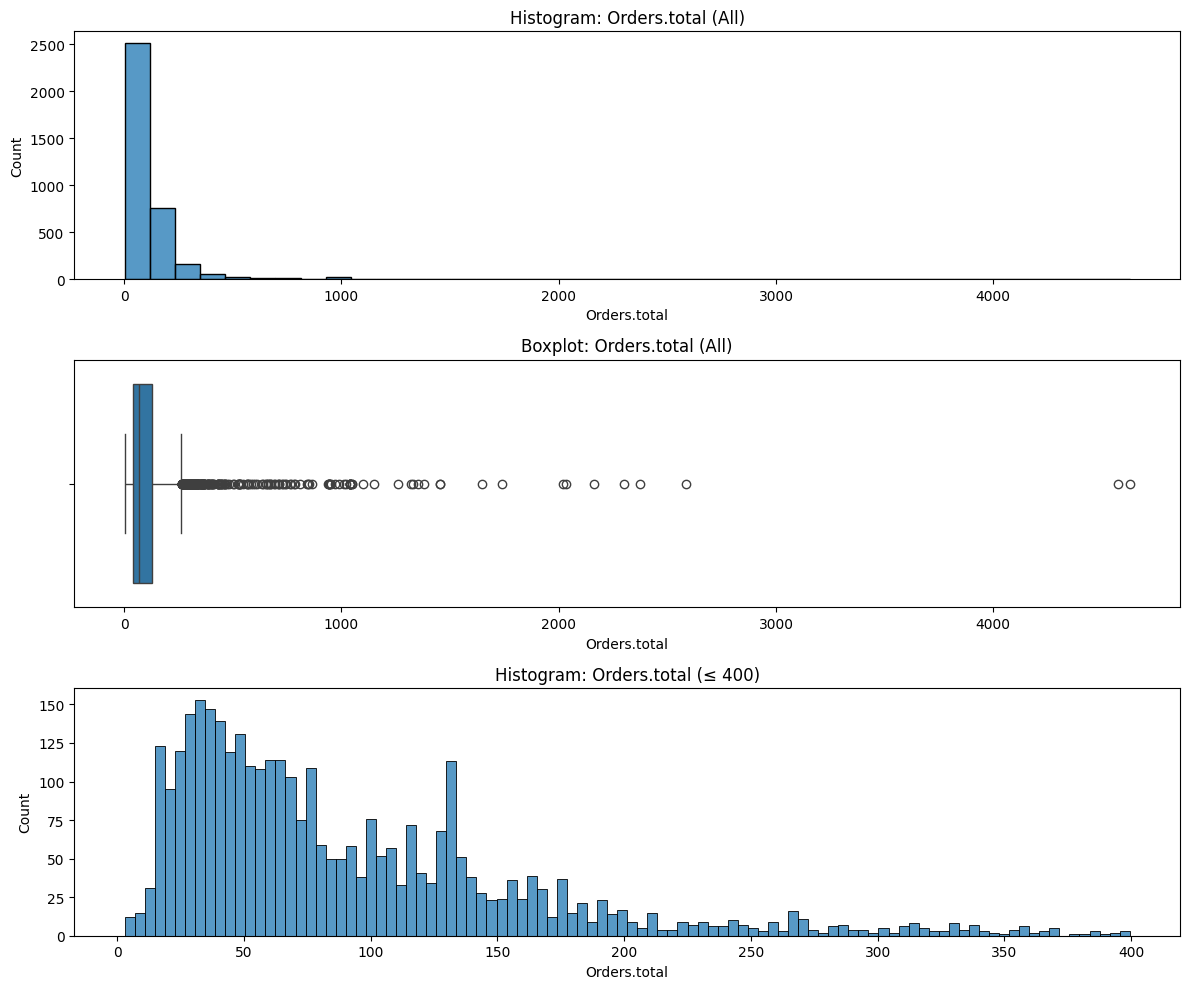

In [21]:
plt.figure(figsize=(12, 10))

# =================== 1. Histogram: all Orders.total 
plt.subplot(3, 1, 1)
sns.histplot(df_orders['Orders.total'], bins=40)
plt.title('Histogram: Orders.total (All)')

# =================== 2. Boxplot: all Orders.total 
plt.subplot(3, 1, 2)
sns.boxplot(x=df_orders['Orders.total'])
plt.title('Boxplot: Orders.total (All)')

# =================== 3. Histogram: Orders.total <= 400 
plt.subplot(3, 1, 3)
sns.histplot(df_orders[df_orders['Orders.total'] <= 400]['Orders.total'], bins=100)
plt.title('Histogram: Orders.total (≤ 400)')

plt.tight_layout()
plt.show()

**PAYMENT & SHIPPING OPERATIONS**

In [25]:
print("-------------------------------------------------------\n")
print("               Bestellstatus nach Zahlungsstatus  \n")


ct_status = pd.crosstab(df_orders["Orders.status"], df_orders["Orders.payment_status"])
ct_status

-------------------------------------------------------

               Bestellstatus nach Zahlungsstatus  



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.status,,,,
Cancelled,13,11,0,0
Completed,3295,0,4,18
Error,1,0,0,0
On Hold,12,0,0,0
Pending,7,15,0,0
Refunded,101,9,1,0
Shipped,53,2,0,2
Unknown,3,1,0,0
Validation Required,17,0,0,0


In [37]:
print("--------------------------------------------------------\n")
print("              Zahlungsart nach Zahlungsstatus  \n")
ct_pay_method = pd.crosstab(df_orders["Orders.payment_method"], df_orders["Orders.payment_status"])
ct_pay_method

--------------------------------------------------------

              Zahlungsart nach Zahlungsstatus  



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.payment_method,,,,
Cash,2,0,0,0
Check,24,0,0,0
Credit Card,360,0,5,6
PayPal,281,0,0,0
authorize.net,2835,38,0,0


In [116]:
df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
#df_orders["has_shipping"] = (df_orders["Orders.shipping"] > 0).astype(int)
df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)
#
df_orders['has_shipping'] = df_orders['Orders.shipping'].fillna(0).gt(0).astype(int)
df_orders['no_shipping'] = df_orders['Orders.shipping'].fillna(0).le(0).astype(int)

# discount_name є завжди, але треба перевірити, чи там "No Discount", "" або NaN
df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

In [117]:
print("----------------------------------------------------------------------------\n")
print("                      Orders.status  nach  Feature-Indikatoren  \n")

ct_features = df_orders.groupby("Orders.status", observed=True)[[
    "has_reorder",
    "has_tax",
    "has_shipping",
    "no_shipping",
    "has_coupon",
    "has_discount"
]].sum()

ct_features

----------------------------------------------------------------------------

                      Orders.status  nach  Feature-Indikatoren  



,has_reorder,has_tax,has_shipping,no_shipping,has_coupon,has_discount
Orders.status,,,,,,
Cancelled,1,1,17,7,3,0
Completed,61,235,2322,995,598,258
Error,0,0,0,1,0,0
On Hold,0,1,7,5,2,3
Pending,0,2,9,13,3,1
Refunded,0,7,67,44,22,2
Shipped,1,12,41,16,5,3
Unknown,0,0,3,1,0,0
Validation Required,0,3,10,7,7,0


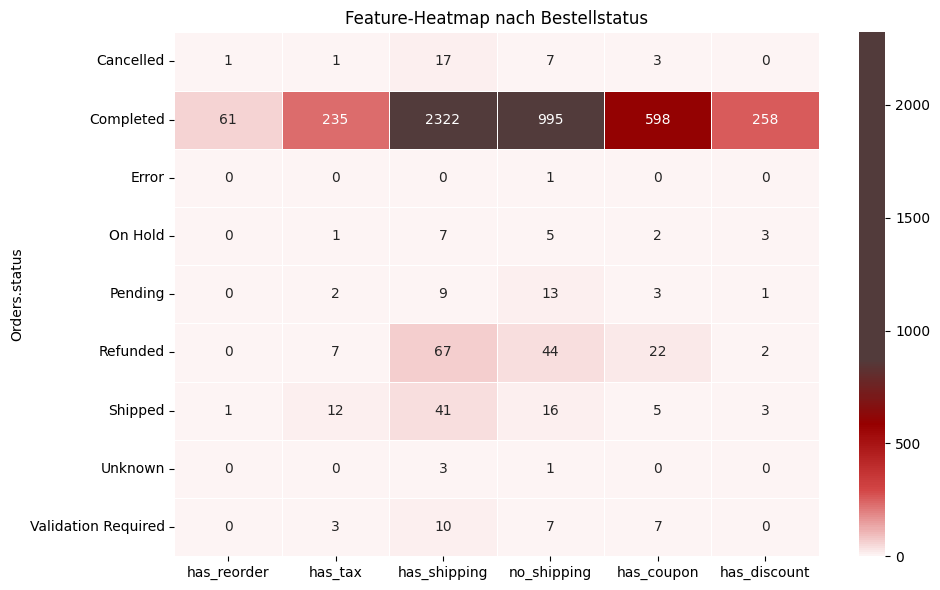

In [118]:
# # ---------- 1. Бінарні колонки ----------
# df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
# df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
# df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)
# df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

# # ---------- 2. Крос-таблиця ----------
# ct_features = df_orders.groupby("Orders.status")[[
#     "has_reorder",
#     "has_tax",
#     "has_shipping",
#     "has_coupon",
#     "has_discount"
# ]].sum()


# ---------- 3. Heatmap ----------
from matplotlib.colors import LinearSegmentedColormap

colors = [
    "#fdf4f4",  # 0%
    "#D34646",  # 10%
    "#970000",  # 25%
    "#523B3B",  
    "#523B3B",  # 50%
    "#523B3B", 
    "#523B3B",  # 75%
    "#523B3B",   
    "#523B3B",  # 100%         
]

custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

plt.figure(figsize=(10, 6))
sns.heatmap(
    ct_features,
    annot=True,
    fmt="d",
    cmap=custom_cmap,
    linewidths=0.5,
    linecolor="white"
)

plt.title("Feature-Heatmap nach Bestellstatus")
plt.ylabel("Orders.status")
plt.tight_layout()
plt.show()

In [ ]:
###   -- ПРИКЛАД зі стандартною кольоровою мапою
# sns.heatmap(
#     ct_features,
#     annot=True,
#     fmt="d",
#     cmap="Reds"
# )
# plt.tight_layout()


In [202]:
#df['Orders.shipping'].value_counts(dropna=False).head(10)

In [41]:
df_clean = df_orders.dropna(subset=[
    "Orders.shipping_carrier",
    "Orders.shipping_method"
])

df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)

C:\Users\Anna\AppData\Local\Temp\ipykernel_15908\3670468802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)


In [42]:
ct_carrier = pd.crosstab(df_clean["Orders.shipping_carrier"],
                          df_clean["shipping_paid"]
)
ct_carrier

shipping_paid,0,1
Orders.shipping_carrier,,
FEDX,0,1
HWEP,0,1
INTF,0,1
MT03,0,1
NDSN,1,0
NSVA,1,0
RDWY,0,1
WTVA,1,1
fedex,375,1628


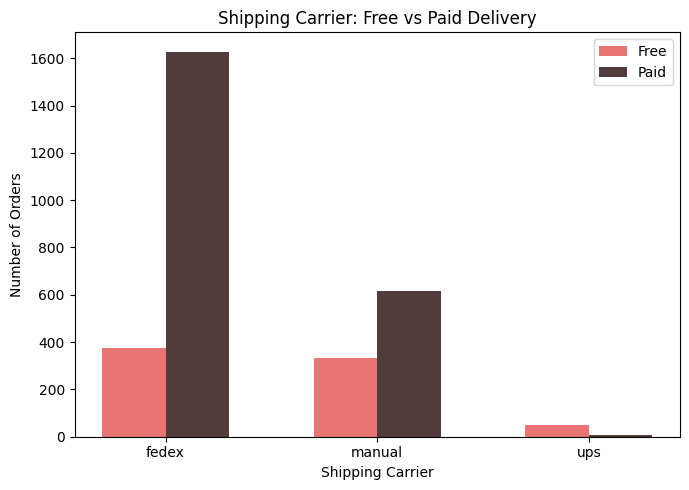

In [43]:
ct_carrier = pd.crosstab(
    df_clean["Orders.shipping_carrier"],
    df_clean["shipping_paid"]
)

main_methods = ["fedex", "manual", "ups"]
ct_main = ct_carrier.loc[main_methods]

free = ct_main[0].values
paid = ct_main[1].values
methods = ct_main.index.tolist()

x = np.arange(len(methods))
width = 0.3

plt.figure(figsize=(7, 5))

plt.bar(x - width/2, free, width, label="Free", color="#E97474")
plt.bar(x + width/2, paid, width, label="Paid", color="#523B3B")

plt.xticks(x, methods)
plt.ylabel("Number of Orders")
plt.xlabel("Shipping Carrier")
plt.title("Shipping Carrier: Free vs Paid Delivery")
plt.legend()

plt.tight_layout()
plt.show()


In [547]:
# ct_carrier = pd.crosstab(
#     df_clean["Orders.shipping_carrier"],
#     df_clean["shipping_paid"]
# )

# # Select only standard methods
# main_methods = ["fedex", "manual", "ups"]
# ct_main = ct_carrier.loc[main_methods]

# #  free or paid
# free = ct_main[0].values
# paid = ct_main[1].values
# methods = ct_main.index.tolist()

# # plot
# x = np.arange(len(methods))
# height = 0.35

# plt.figure(figsize=(8, 4))
# plt.barh(x - height/2, free, height, label="Free", color="#3B5C80")
# plt.barh(x + height/2, paid, height, label="Paid", color="#9BC56E")

# plt.yticks(x, methods)
# plt.xlabel("Number of Orders")
# plt.title("Shipping Carrier: Free vs Paid Delivery")
# plt.legend()

# plt.tight_layout()
# plt.show()

In [44]:
ct_method = pd.crosstab(
    df_clean["shipping_paid"],
    df_clean["Orders.shipping_method"]
)
ct_method.T

shipping_paid,0,1
Orders.shipping_method,,
FEDERAL EXPRESS CORP.,0,1
Free Shipping,300,6
Ground,375,1628
"HOWARD'S EXPRESS, INC.",0,1
INTERNATIONAL FEDEX,0,1
MEDTRANS,0,1
NATIONAL DELIVERY,1,0
NATIONAL DELIVERY SYSTEMS,1,0
ROADWAY EXPRESS,0,1


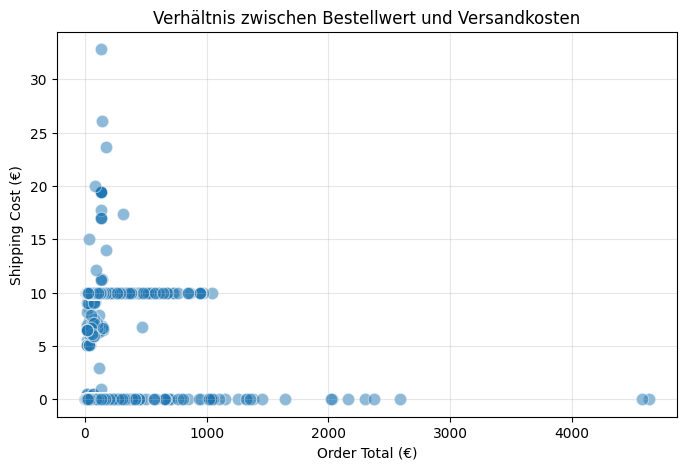

In [45]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_orders,
    x="Orders.total",
    y="Orders.shipping",
   # color="#208989",
    s=80,        # більші точки
    alpha=0.5    # більше прозорості
)

plt.xlabel("Order Total (€)")
plt.ylabel("Shipping Cost (€)")
plt.title("Verhältnis zwischen Bestellwert und Versandkosten")
plt.grid(True, alpha=0.3)
# Achsenbereich auf der Y-Achse so begrenzen, dass nur die kostenpflichtigen Lieferungen angezeigt werden (>0)
#plt.ylim(1,35)
plt.show()

In [ ]:
#new Boxplot по діапазонах замовлень
df['order_range'] = pd.cut(df['Orders.total'], 
                            bins=[0, 100, 300, 500, 1000, 5000],
                            labels=['<€100', '€100-300', '€300-500', 
                                   '€500-1k', '>€1k'])

# Boxplot:
sns.boxplot(data=df, x='order_range', y='Orders.shipping')
plt.title('Shipping Cost Distribution by Order Value Range')

C:\Users\Anna\AppData\Local\Temp\ipykernel_15908\1403312720.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_15908\1403312720.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


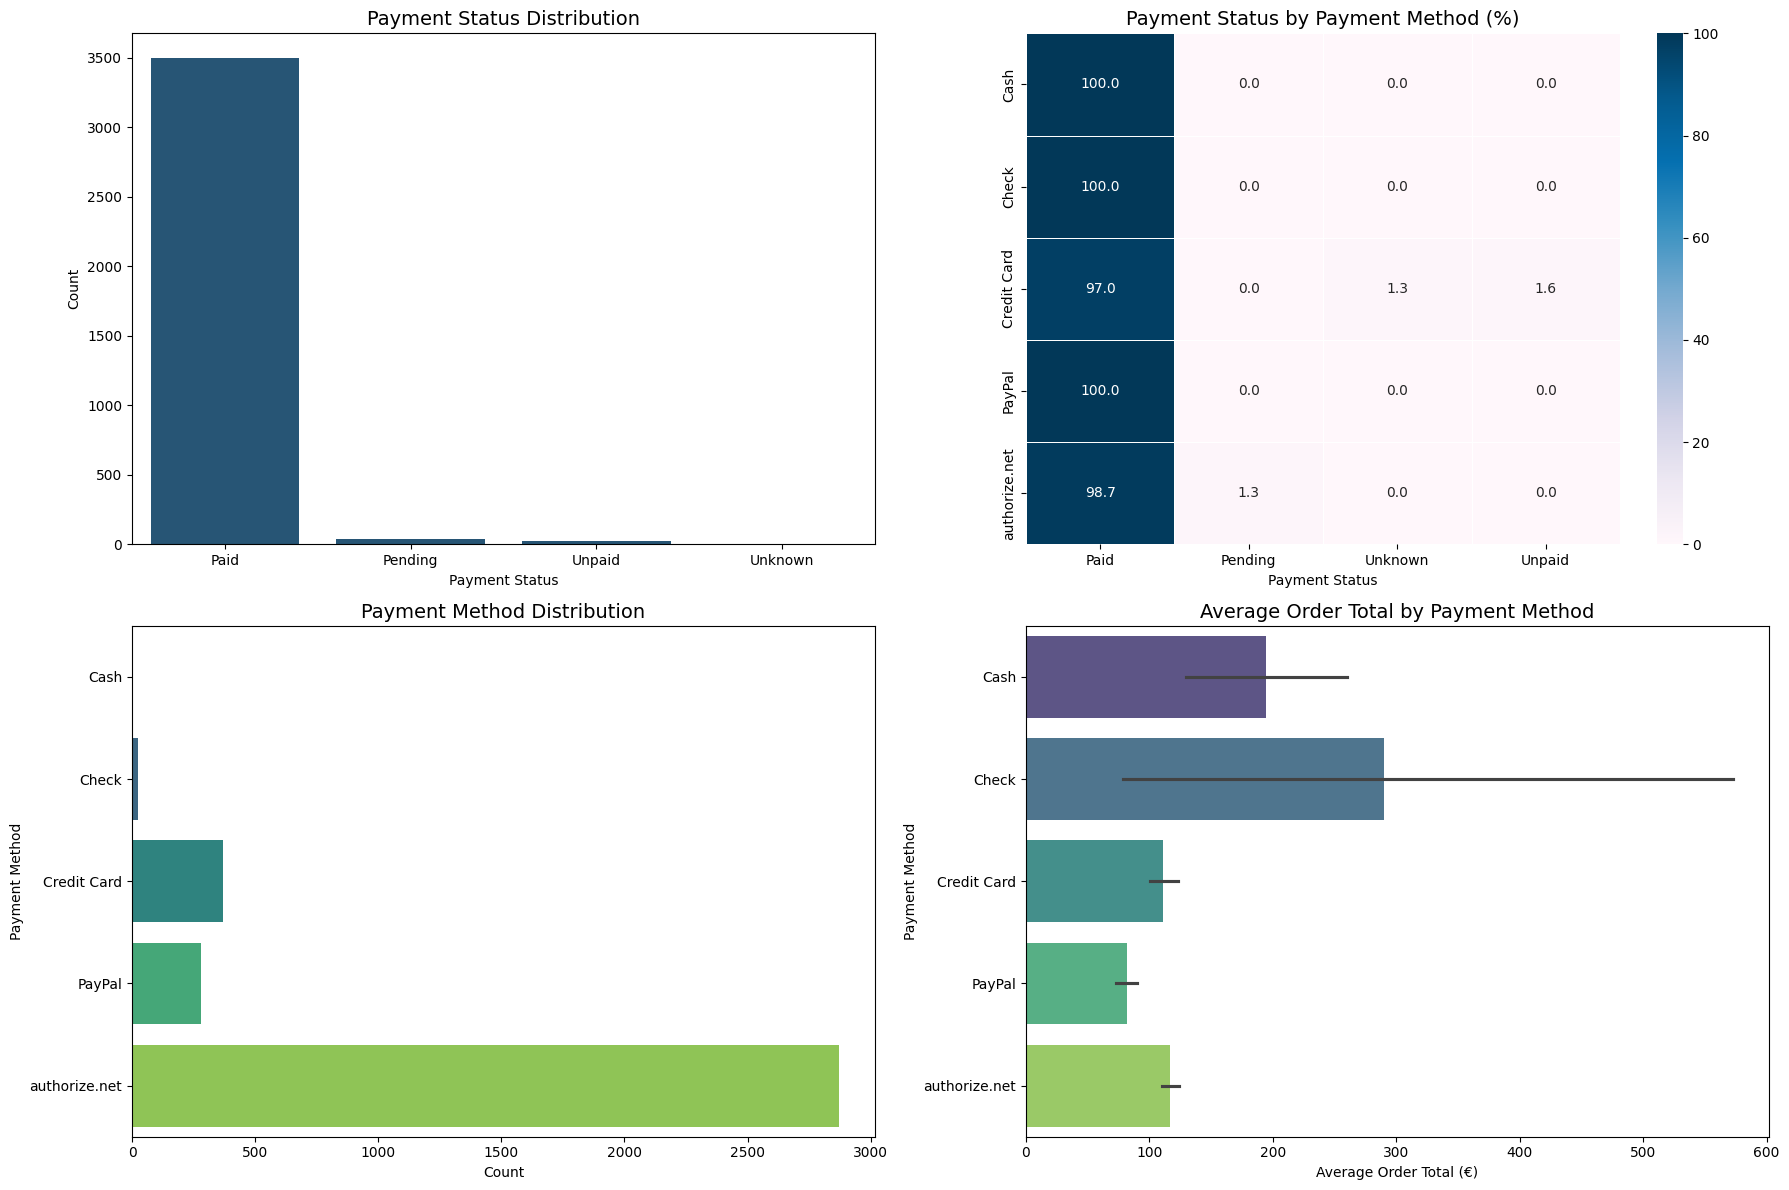

'confidence intervals - довірчі інтервали які seaborn додає за замовчуванням до barplot.\nВони показують:\nНаскільки надійна оцінка середнього значення\nНаявність варіації / розкиду даних в групі\nЯкщо лінія дуже довга - дані сильно варіюються (великий розкид значень)\nЯкщо коротка - середня оцінка стабільна.\n'

In [38]:
# --- Єдиний порядок payment_method для графіків 3 і 4 ---
method_order = sorted(df_orders['Orders.payment_method'].dropna().unique())


fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# === 1. Payment Status Distribution ===
sns.countplot(
    data=df_orders,
    x='Orders.payment_status',
    order=df_orders['Orders.payment_status'].value_counts().index,
    ax=axes[0, 0],
    color="#1A5782"
 
)
axes[0, 0].set_title('Payment Status Distribution', fontsize=14)
axes[0, 0].set_xlabel('Payment Status')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)


# === 2. Heatmap (Payment Status by Payment Method) ===
ct = pd.crosstab(
    df_orders['Orders.payment_method'],
    df_orders['Orders.payment_status'],
    normalize='index'
) * 100

sns.heatmap(
    ct,
    annot=True,
    fmt=".1f",
    cmap='PuBu',
    linewidths=.5,
    ax=axes[0, 1]
)

axes[0, 1].set_title('Payment Status by Payment Method (%)', fontsize=14)
axes[0, 1].set_xlabel('Payment Status')
axes[0, 1].set_ylabel(' ')


# === 3. Payment Method Distribution (HORIZONTAL, sorted!) ===
sns.countplot(
    data=df_orders,
    y='Orders.payment_method',     # ← категорії тепер по осі Y
    order=method_order,
    ax=axes[1, 0],
    palette="viridis",
)
axes[1, 0].set_title('Payment Method Distribution', fontsize=14)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Payment Method')
axes[1, 0].tick_params(axis='y', rotation=0)


# === 4. Average Order Total by Payment Method (HORIZONTAL) ===
sns.barplot(
    data=df_orders,
    y='Orders.payment_method',     # ← теж по Y
    x='Orders.total',
    estimator='mean',
    order=method_order,
    ax=axes[1, 1],
    palette="viridis",
    alpha=0.9
)
axes[1, 1].set_title('Average Order Total by Payment Method', fontsize=14)
axes[1, 1].set_xlabel('Average Order Total (€)')
axes[1, 1].set_ylabel('Payment Method')
axes[1, 1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


'''confidence intervals - довірчі інтервали які seaborn додає за замовчуванням до barplot.
Вони показують:
Наскільки надійна оцінка середнього значення
Наявність варіації / розкиду даних в групі
Якщо лінія дуже довга - дані сильно варіюються (великий розкид значень)
Якщо коротка - середня оцінка стабільна.
'''

authorize.net  - payment gateway in USA ()

**PRODUCT & PROFITABILITY ANALYTICS**

In [22]:
### --- outliers investigation --- ORDERs!!!!!
#Filtered High-Value Orders ( >1500€ )

#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

print("----------------------------------------------------------------------\n")
print("                Hochwertige Bestellungen (über 1500 $)       \n")

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]


----------------------------------------------------------------------

                Hochwertige Bestellungen (über 1500 $)       



,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


In [ ]:
# пошук чому там NaN - тому що замовлення не оплачене
df_orders.loc[
    df_orders['Orders.total'] > 1500,
    ['Orders.id', 'Orders.total', 'Orders.payment_status',
     'Orders.payment_method', 'Orders.payment_amount']
]

,Orders.id,Orders.total,Orders.payment_status,Orders.payment_method,Orders.payment_amount
128,572,2300.00,Paid,authorize.net,2300.00
203,965,1647.06,Paid,authorize.net,1548.06
473,2144,4627.95,Paid,authorize.net,4627.95
1931,9742,2031.93,Paid,authorize.net,2031.93
2035,10729,2375.59,Paid,Check,2375.59
2510,12835,2017.92,Unpaid,NaN,NaN
2511,12836,1740.00,Paid,authorize.net,580.00
2936,14924,4575.00,Paid,authorize.net,4575.00
3083,15457,2164.30,Paid,authorize.net,2164.30
3129,15657,2588.00,Paid,Check,2588.00


Items/Positionen

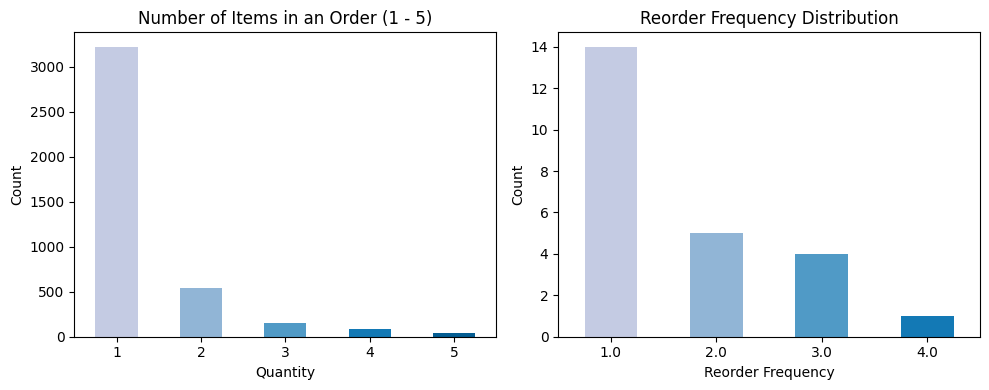

In [46]:
colors = sns.color_palette("PuBu", n_colors=6)[1:]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# -------------------------------
# 1) Кількість товарів у замовленні (1–5)
# -------------------------------
small_qty = df[df['Order_Items.qty'] <= 5]

small_qty['Order_Items.qty'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar', color=colors, ax=axes[0])

axes[0].set_title('Number of Items in an Order (1 - 5)')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# -------------------------------
# 2) Частота повторного замовлення
# -------------------------------
(df_items[df_items['Order_Items.reorder_frequency'].notna()]
    ['Order_Items.reorder_frequency']
    .value_counts()
    .sort_index()
    .plot(kind='bar', color=colors, ax=axes[1]))

axes[1].set_title('Reorder Frequency Distribution')
axes[1].set_xlabel('Reorder Frequency')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


<Axes: xlabel='count', ylabel='avg_price'>

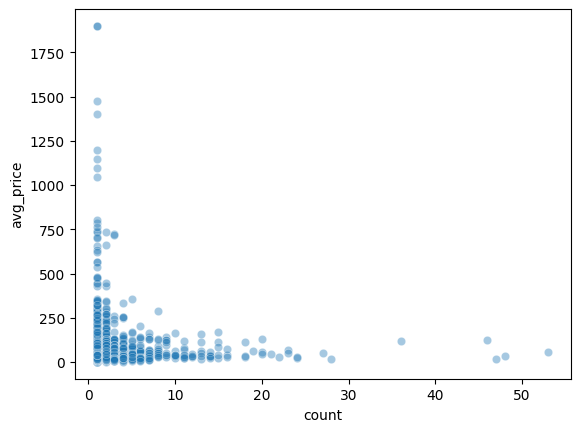

In [47]:
# NO!!!
group_product_name = df_items.groupby("Order_Items.product_name").agg(
    count=("Order_Items.id", "count"),
    avg_price=("Order_Items.price", "mean")
)
sns.scatterplot(data=group_product_name, x="count", y="avg_price", alpha=0.4)


### **RFM und CLV**

In [14]:
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date'], errors='coerce')#прибрати!!!!
# ----------------------------
# 1. Reference date
# ----------------------------
reference_date = df['Orders.placed_date'].max()

# ----------------------------
# 2. Підготовка окремої таблиці замовлень без дублювання
# ----------------------------
orders_unique = df.drop_duplicates(subset='Orders.id').copy()

# Для коректності — гарантуємо правильні типи
orders_unique['Orders.total'] = pd.to_numeric(orders_unique['Orders.total'], errors='coerce')
orders_unique['Orders.placed_date'] = pd.to_datetime(orders_unique['Orders.placed_date'], errors='coerce')

# ----------------------------
# 3. Обчислення RFM
# ----------------------------

# Recency — коли клієнт востаннє зробив замовлення
recency = (reference_date - orders_unique.groupby('Customers.id')['Orders.placed_date'].max()).dt.days
recency = recency.rename('Recency_days')

# Frequency — кількість унікальних замовлень
frequency = orders_unique.groupby('Customers.id')['Orders.id'].nunique()
frequency = frequency.rename('Frequency_orders')

# Monetary — сума унікальних замовлень
monetary = orders_unique.groupby('Customers.id')['Orders.total'].sum()
monetary = monetary.rename('Monetary_total')

# ----------------------------
# 4. Об'єднання в RFM таблицю
# ----------------------------
rfm = pd.concat([recency, frequency, monetary], axis=1).reset_index()

print(rfm.head())
print(rfm.shape)

   Customers.id  Recency_days  Frequency_orders  Monetary_total
0             3           159                 2          108.72
1             4           887                 1           29.55
2             5           614                 3          124.99
3             7           871                 1           49.14
4             8           857                 1           69.70
(3054, 4)


RFM сформований правильно, дублі не вплинули, Money не завищений, Frequency не сплутаний з товарними позиціями.

###  CLV

In [16]:
#Historical CLV
rfm['CLV'] = rfm['Monetary_total']

#CLV (High / Medium / Low) 0.33 та 0.66
rfm['CLV_segment'] = pd.qcut(rfm['CLV'], q=3, labels=['Low', 'Medium', 'High'])


In [17]:
#at risk
# "high recency" = no bay long time -> risk 
# top 20% Recency

threshold = rfm['Recency_days'].quantile(0.80)
rfm['At_risk'] = (rfm['Recency_days'] > threshold).astype(int)


rfm['High_value_at_risk'] = ((rfm['CLV_segment'] == 'High') & 
                             (rfm['At_risk'] == 1)).astype(int)

In [18]:
rfm_sorted = rfm.sort_values('CLV', ascending=False)
top20 = rfm_sorted.head(int(0.2 * len(rfm_sorted)))
top20_revenue_share = top20['CLV'].sum() / rfm['CLV'].sum()
print(f"Top 20% customers generate {top20_revenue_share:.2%} of revenue")

Top 20% customers generate 61.78% of revenue


In [19]:
lost_clv = rfm[rfm['High_value_at_risk'] == 1]['CLV'].sum()
print(f"At Risk segment has ${lost_clv:,.0f} CLV at stake")

At Risk segment has $56,894 CLV at stake


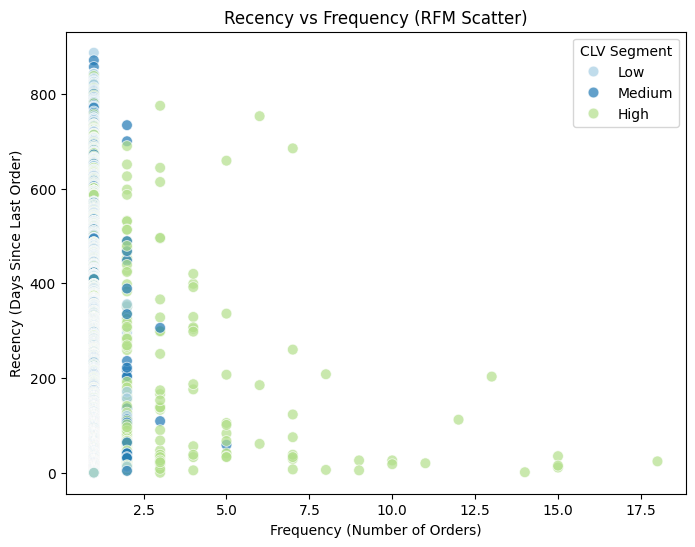

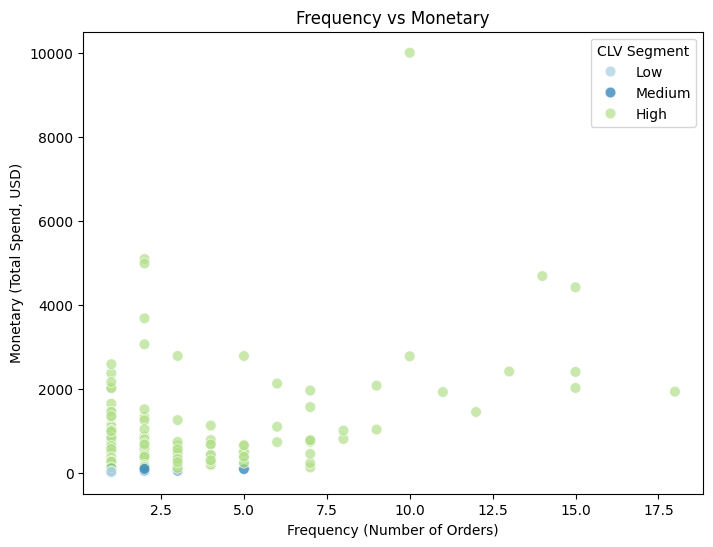

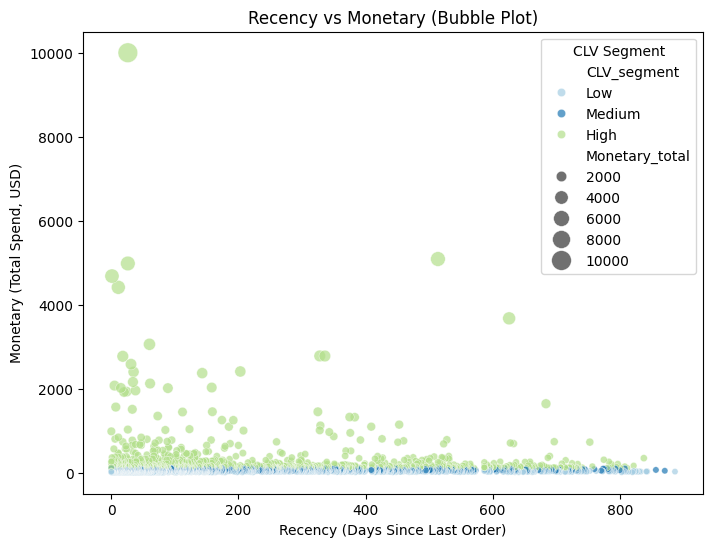

In [ ]:
# Уникаємо попереджень
#sns.set(style="whitegrid")

# Кольори для CLV сегментів
palette = {
    'Low': '#a6cee3',
    'Medium': '#1f78b4',
    'High': '#b2df8a'
}

# --------------------------------------------
# 1 Recency vs Frequency
# --------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm,
    x='Frequency_orders',
    y='Recency_days',
    hue='CLV_segment',
    palette=palette,
    alpha=0.7,
    s=60
)
plt.title("Recency vs Frequency (RFM Scatter)")
plt.xlabel("Frequency (Number of Orders)")
plt.ylabel("Recency (Days Since Last Order)")
plt.legend(title="CLV Segment")
plt.show()

# --------------------------------------------
# 2 Frequency vs Monetary
# --------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm,
    x='Frequency_orders',
    y='Monetary_total',
    hue='CLV_segment',
    palette=palette,
    alpha=0.7,
    s=60
)
plt.title("Frequency vs Monetary")
plt.xlabel("Frequency (Number of Orders)")
plt.ylabel("Monetary (Total Spend, USD)")
plt.legend(title="CLV Segment")
plt.show()

# --------------------------------------------
# 3 Recency vs Monetary (highlight high-value)
# --------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm,
    x='Recency_days',
    y='Monetary_total',
    hue='CLV_segment',
    palette=palette,
    alpha=0.7,
    size='Monetary_total',
    sizes=(20, 200),
    legend="brief"
)
plt.title("Recency vs Monetary (Bubble Plot)")
plt.xlabel("Recency (Days Since Last Order)")
plt.ylabel("Monetary (Total Spend, USD)")
plt.legend(title="CLV Segment")
plt.show()

In [127]:
rfm.columns


Index(['Customers.id', 'Recency_days', 'Frequency_orders', 'Monetary_total',
       'CLV', 'CLV_segment', 'At_risk', 'High_value_at_risk', 'Recency_bin',
       'Frequency_bin'],
      dtype='object')

C:\Users\Anna\AppData\Local\Temp\ipykernel_15908\102264402.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = rfm.pivot_table(


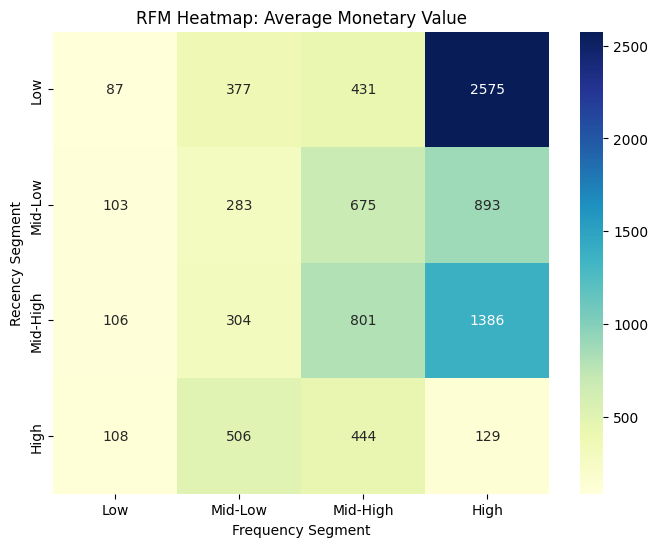

In [15]:
# Recency bins - qcut OK
rfm['Recency_bin'] = pd.qcut(
    rfm['Recency_days'], 
    q=4,
    labels=['Low', 'Mid-Low', 'Mid-High', 'High'],
    duplicates='drop'
)

# Frequency bins – manual to avoid duplicates
rfm['Frequency_bin'] = pd.cut(
    rfm['Frequency_orders'],
    bins=[0, 1, 3, 6, 100],
    labels=['Low', 'Mid-Low', 'Mid-High', 'High']
)

# Pivot for heatmap
pivot = rfm.pivot_table(
    values='Monetary_total',
    index='Recency_bin',
    columns='Frequency_bin',
    aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("RFM Heatmap: Average Monetary Value")
plt.xlabel("Frequency Segment")
plt.ylabel("Recency Segment")
plt.show()

In [31]:
df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])

daily_sales = df_orders.groupby('Orders.placed_date')['Orders.total'].sum().sort_index()
weekly_sales = df_orders.resample('W', on='Orders.placed_date')['Orders.total'].sum()
monthly_sales = df_orders.resample('M', on='Orders.placed_date')['Orders.total'].sum()

C:\Users\Anna\AppData\Local\Temp\ipykernel_15908\943786263.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_orders.resample('M', on='Orders.placed_date')['Orders.total'].sum()


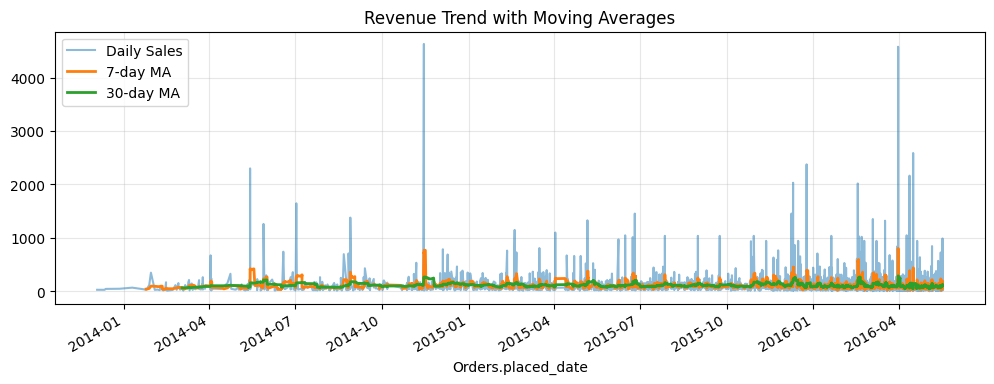

In [32]:
plt.figure(figsize=(12,4))
daily_sales.plot(label='Daily Sales', alpha=0.5)
daily_sales.rolling(7).mean().plot(label='7-day MA', linewidth=2)
daily_sales.rolling(30).mean().plot(label='30-day MA', linewidth=2)
plt.legend()
plt.title("Revenue Trend with Moving Averages")
plt.grid(alpha=0.3)
plt.show()

Moving averages демонструють чіткий тренд зростання продажів протягом 2014–2016 років.
Щоденні продажі характеризуються високою волатильністю через оптові замовлення, але 7-денне і 30-денне середнє показують стабільне збільшення середнього доходу.

In [34]:
df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])

daily = df_orders.groupby(df_orders['Orders.placed_date'].dt.date)['Orders.total'].sum()
daily.index = pd.to_datetime(daily.index)

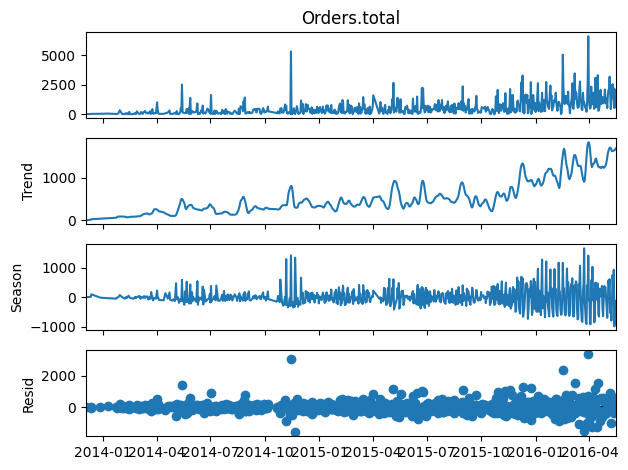

In [35]:
from statsmodels.tsa.seasonal import STL

stl = STL(daily, period=7)
res = stl.fit()
res.plot()
plt.show()


Підсумок у 4 реченнях (в проект.md)

Дані показують чіткий зростаючий тренд продажів протягом 2014–2016 років.
Присутня стабільна тижнева сезонність, яка посилюється з часом.
Велика кількість аномальних днів пов’язана з великими B2B-замовленнями.
Ряд добре піддається трендовому аналізу, але важко моделюється ARIMA через сильні аномалії.

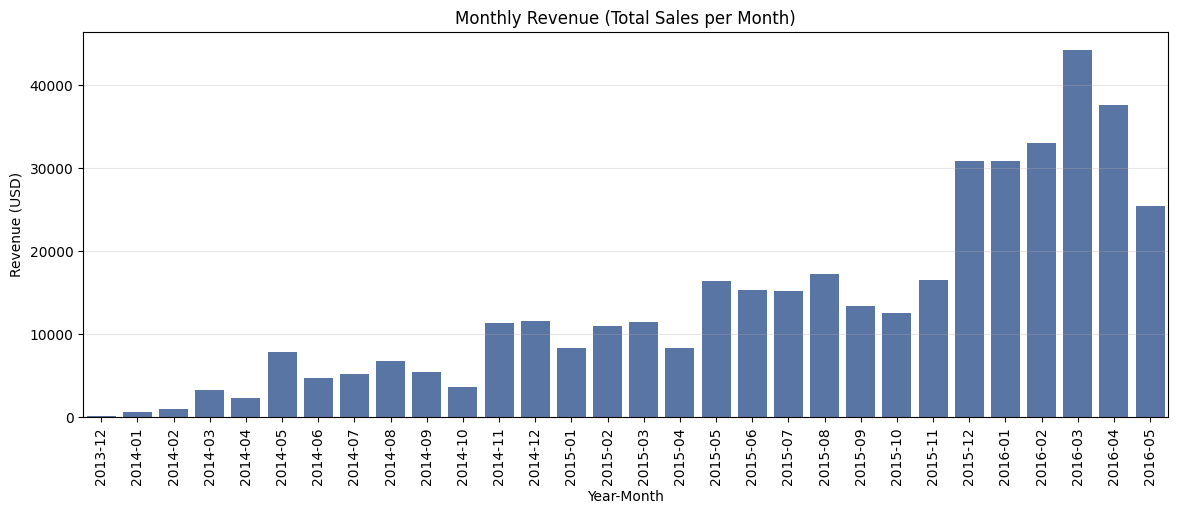

In [36]:
# --- Monthly Revenue from df_orders ---

df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])

# Create year-month column
df_orders['year_month'] = df_orders['Orders.placed_date'].dt.to_period('M').astype(str)

# Aggregate revenue
monthly_revenue = (
    df_orders.groupby('year_month')['Orders.total']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 5))
sns.barplot(
    data=monthly_revenue,
    x='year_month',
    y='Orders.total',
    color='#4C72B0'
)

plt.xticks(rotation=90)
plt.title("Monthly Revenue (Total Sales per Month)")
plt.xlabel("Year-Month")
plt.ylabel("Revenue (USD)")
plt.grid(axis='y', alpha=0.3)

plt.show()


**Products/Artikel**

### Margin/Marge

In [24]:
### --- outliers investigation --- PRICE!!!!!
#Filtered High-Value Orders ( >1500€ )

#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

print("----------------------------------------------------\n")
print("      Hochwertige Bestellungen (über 1500 $)       \n")

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]


----------------------------------------------------

      Hochwertige Bestellungen (über 1500 $)       



,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


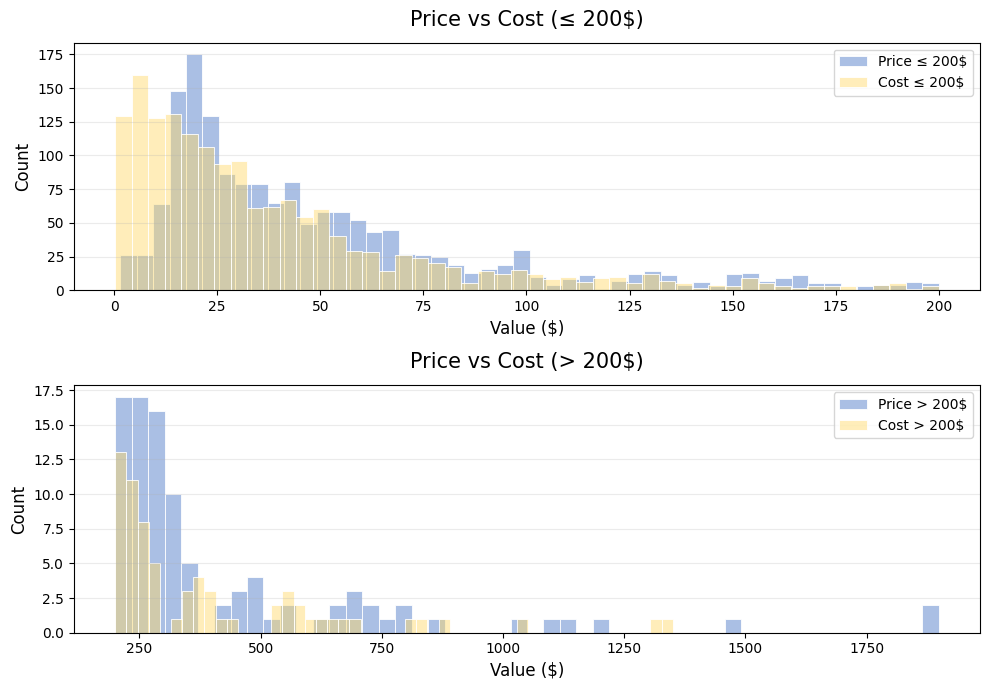

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=False)

price_color = "#4472C4"   # blue
cost_color  = "#FFD966"   # yellow


# ===== TOP subplot: ≤ 200$ =====
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] <= 200)],
    x="Products.price",
    bins=50,
    color=price_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[0]
)

sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] <= 200)],
    x="Products.cost",
    bins=50,
    color=cost_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[0]
)

axes[0].set_title("Price vs Cost (≤ 200$)", fontsize=15, pad=12)
axes[0].set_xlabel("Value ($)", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].grid(axis='y', alpha=0.25)
axes[0].legend(["Price ≤ 200$", "Cost ≤ 200$"])


# ===== BOTTOM subplot: > 200$ =====
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] > 200)],
    x="Products.price",
    bins=50,
    color=price_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[1]
)

sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] > 200)],
    x="Products.cost",
    bins=50,
    color=cost_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[1]
)

axes[1].set_title("Price vs Cost (> 200$)", fontsize=15, pad=12)
axes[1].set_xlabel("Value ($)", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].grid(axis='y', alpha=0.25)
axes[1].legend(["Price > 200$", "Cost > 200$"])


plt.tight_layout()
plt.show()


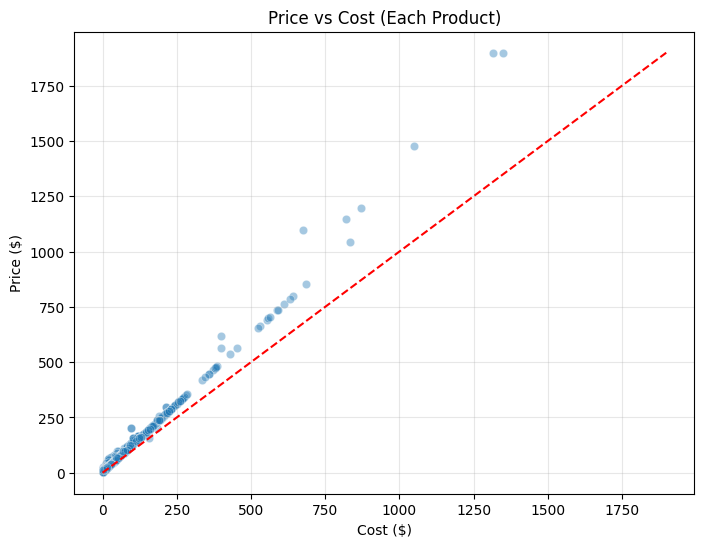

In [210]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="Products.price",
    alpha=0.4
)

# Red line ->  price=cost (ohne Margin)
max_val = max(df_products["Products.price"].max(), df_products["Products.cost"].max())
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")

plt.xlabel("Cost ($)")
plt.ylabel("Price ($)")
plt.title("Price vs Cost (Each Product)")
plt.grid(alpha=0.3)
plt.show()

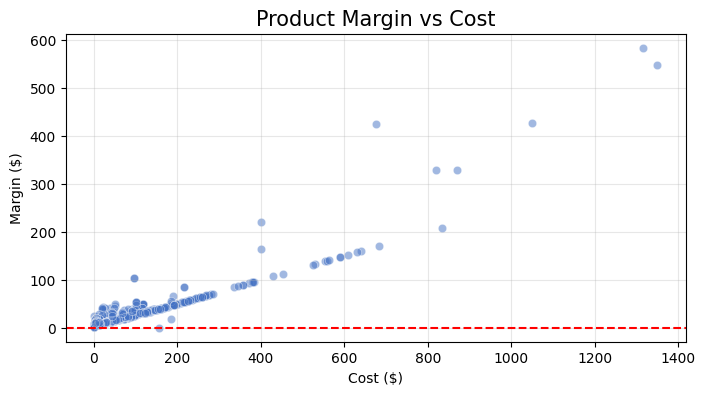

In [211]:
df_products["margin"] = (
    df_products["Products.price"] - df_products["Products.cost"]
)

plt.figure(figsize=(8, 4))

sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.5,
    color="#4472C4"
)

plt.axhline(0, color="red", linestyle="--")  # лінія нульової маржі

plt.title("Product Margin vs Cost", fontsize=15)
plt.xlabel("Cost ($)")
plt.ylabel("Margin ($)")
plt.grid(alpha=0.3)
plt.show()


,Products.name,Products.price,Products.cost,margin,margin_perc
1211,Battery Powered Electric Patient Lift with Rec...,1899.00,1315.00,584.00,44.410646
884,Cirrus Plus EC Folding Power Wheelchair,1899.00,1350.00,549.00,40.666667
119,Titan Transportable Front Wheel Power Wheelchair,1475.00,1049.00,426.00,40.610105
1708,Spitfire EX Compact Travel Power Mobility Scoo...,1099.00,675.00,424.00,62.814815
365,"Phoenix Heavy Duty Power Scooter, 3 Wheel",1149.00,819.00,330.00,40.293040
452,"Phoenix Heavy Duty Power Scooter, 4 Wheel",1199.00,869.00,330.00,37.974684
1323,Hydraulic Patient Lift with Six Point Cradle,620.00,399.99,220.01,55.003875
571,Deluxe Sentra Heavy Duty Extra Extra Wide Whee...,1043.75,835.00,208.75,25.000000
889,CircuFlow Lymphedema Pumps,855.14,684.11,171.03,25.000365
1100,Bellavita Auto Bath Tub Chair Seat Lift,565.00,399.99,165.01,41.253531


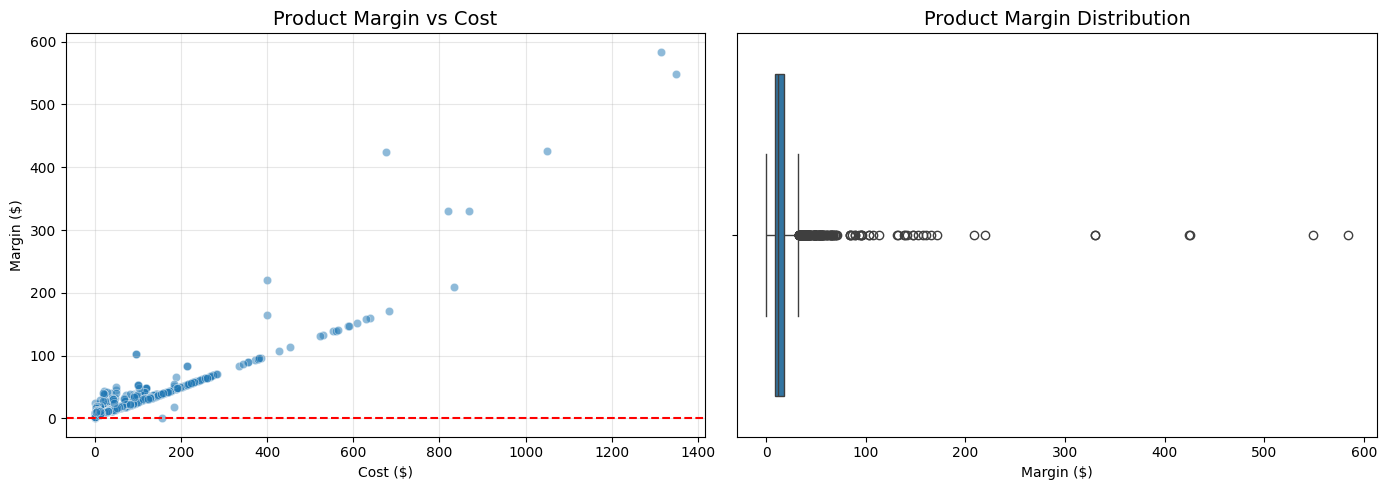

In [ ]:
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax1, ax2 = axes


# === 1: Scatter: Margin vs Cost ===
sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.5,
   # color="#4472C4",
    ax=ax1
)
ax1.axhline(0, color="red", linestyle="--")
ax1.set_title("Product Margin vs Cost", fontsize=14)
ax1.set_xlabel("Cost ($)")
ax1.set_ylabel("Margin ($)")
ax1.grid(alpha=0.3)


# === 2: Line plot: Sorted Margin Curve ===
#diff_sorted = df_products["margin"].dropna().sort_values().reset_index(drop=True)

sns.boxplot(
    x=df_products["margin"],
    ax=ax2
)

ax2.set_title("Product Margin Distribution", fontsize=14)
ax2.set_xlabel("Margin ($)")


plt.tight_layout()
plt.show()


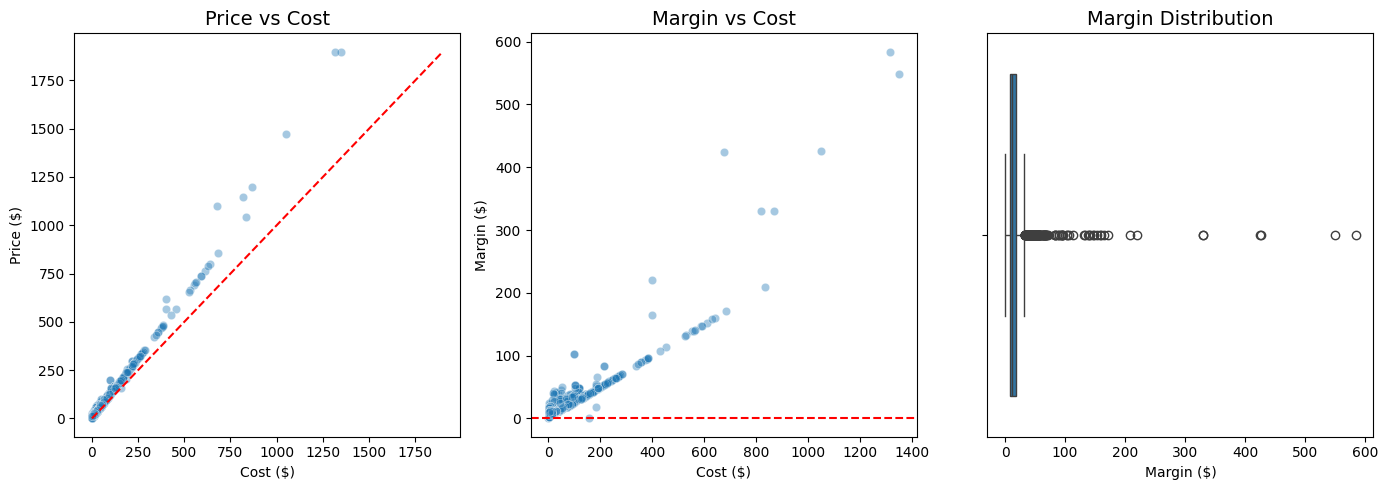

In [57]:
#sns.set_theme(style="whitegrid")


df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

fig, ax = plt.subplots(1, 3, figsize=(14, 5))


# === Price vs Cost ===
sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="Products.price",
    alpha=0.4,
    ax=ax[0]
)

max_val = max(
    df_products["Products.price"].max(),
    df_products["Products.cost"].max()
)

ax[0].plot([0, max_val], [0, max_val],  color="red", linestyle="--")
ax[0].set_title("Price vs Cost", fontsize=14)
ax[0].set_xlabel("Cost ($)")
ax[0].set_ylabel("Price ($)")


# ===  Margin vs Cost ===
sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.4,
    ax=ax[1]
)

ax[1].axhline(0,  color="red", linestyle="--")
ax[1].set_title("Margin vs Cost", fontsize=14)
ax[1].set_xlabel("Cost ($)")
ax[1].set_ylabel("Margin ($)")


# ===  Margin Distribution ===
sns.boxplot(
    x=df_products["margin"],
    ax=ax[2]
)

ax[2].set_title("Margin Distribution", fontsize=14)
ax[2].set_xlabel("Margin ($)")


plt.tight_layout()
plt.show()


**margin by Product**

In [180]:
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]
#df_products["margin_perc"] = (df_products["margin"] / df_products["Products.cost"]) * 100

top_margin = (
    df_products[["Products.name", "Products.price", "Products.cost", "margin"]]
    .sort_values(by="margin", ascending=False)
    .head(10)
)
top_margin

,Products.name,Products.price,Products.cost,margin
1211,Battery Powered Electric Patient Lift with Rec...,1899.00,1315.00,584.00
884,Cirrus Plus EC Folding Power Wheelchair,1899.00,1350.00,549.00
119,Titan Transportable Front Wheel Power Wheelchair,1475.00,1049.00,426.00
1708,Spitfire EX Compact Travel Power Mobility Scoo...,1099.00,675.00,424.00
365,"Phoenix Heavy Duty Power Scooter, 3 Wheel",1149.00,819.00,330.00
452,"Phoenix Heavy Duty Power Scooter, 4 Wheel",1199.00,869.00,330.00
1323,Hydraulic Patient Lift with Six Point Cradle,620.00,399.99,220.01
571,Deluxe Sentra Heavy Duty Extra Extra Wide Whee...,1043.75,835.00,208.75
889,CircuFlow Lymphedema Pumps,855.14,684.11,171.03
1100,Bellavita Auto Bath Tub Chair Seat Lift,565.00,399.99,165.01


C:\Users\Anna\AppData\Local\Temp\ipykernel_15908\1527814854.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


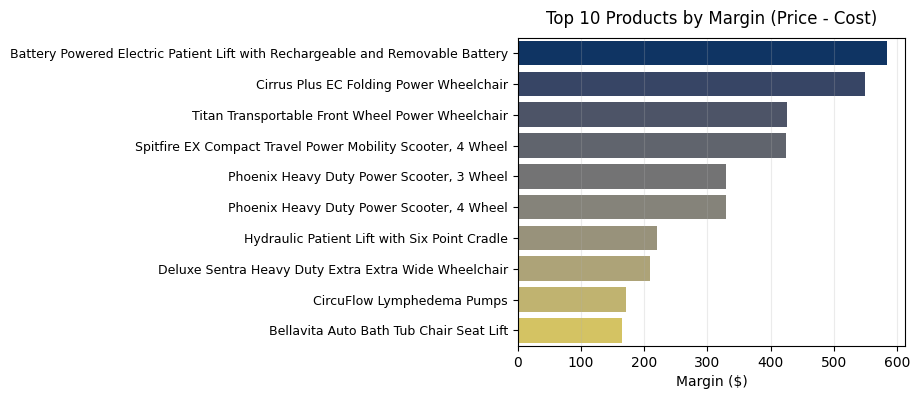

In [181]:
# 1. Створюємо колонку маржі
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

# 2. Вибираємо топ-10 товарів
top_abs_margin = (
    df_products[["Products.name", "Products.price", "Products.cost", "margin"]]
    .sort_values(by="margin", ascending=False)
    .head(10)
)

# 3. Будуємо barplot
plt.figure(figsize=(5, 4))


sns.barplot(
    data=top_abs_margin,
    x="margin",
    y="Products.name",
    hue="Products.name",
    palette="cividis",
    legend=False
)

plt.title("Top 10 Products by Margin (Price - Cost)", fontsize=12, pad=10)
plt.xlabel("Margin ($)")
plt.ylabel("")

plt.yticks(fontsize=9)

plt.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()


**margin by Vendor**

In [2]:
#   NO!!!
# model = smf.ols(
#     formula = 'Q("margin") ~ C(Q("Products.vendor"))',
#     data=df_products
# )

# results = model.fit()
# print(results.summary())

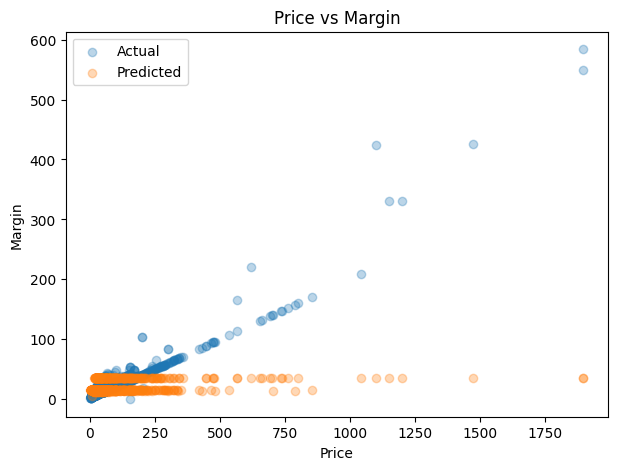

In [ ]:
# NO!!!
plt.figure(figsize=(7, 5))
plt.scatter(
    df_model['Products.price'],
    df_model['margin'],
    alpha=0.3,
    label='Actual'
)

plt.scatter(
    df_model['Products.price'],
    df_model['predicted_margin'],
    alpha=0.3,
    label='Predicted'
)

plt.xlabel('Price')
plt.ylabel('Margin')
plt.title('Price vs Margin')
plt.legend()
plt.show()

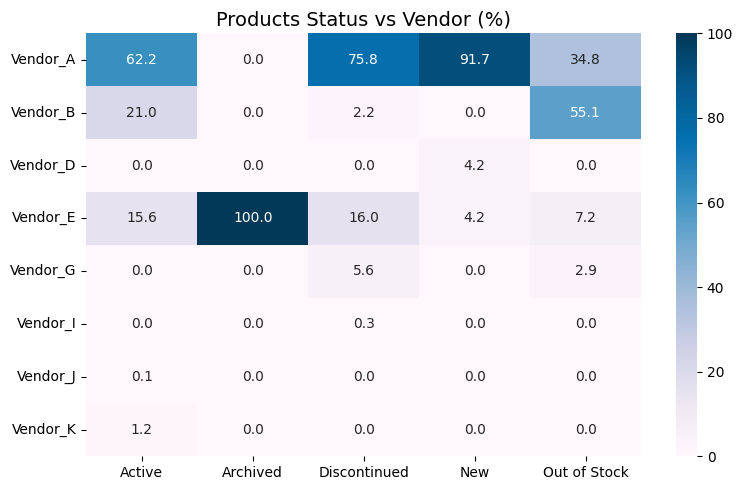

In [65]:
cr_vendor_prod = pd.crosstab(df_products['Products.status'], 
                       df_products['Products.vendor'],
                       normalize='index') * 100
#cr_vendor_prod.round(1)


plt.figure(figsize=(8, 5))
sns.heatmap(
    cr_vendor_prod.T, 
    cmap="PuBu", 
    annot=True, 
    fmt=".1f"
)

plt.title("Products Status vs Vendor (%)", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

**high_margin**

In [79]:
threshold = df_products['margin'].quantile(0.90)

df_products['high_margin'] = (df_products['margin'] >= threshold).astype(int)
print(df_products['high_margin'].value_counts())


high_margin
0    1539
1     171
Name: count, dtype: int64


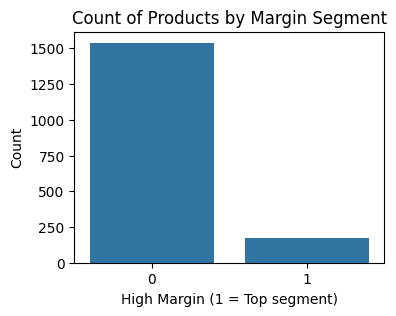

In [76]:
plt.figure(figsize=(4, 3))

sns.countplot(data=df_products, x='high_margin')

plt.title("Count of Products by Margin Segment")
plt.xlabel("High Margin (1 = Top segment)")
plt.ylabel("Count")
plt.show()

In [71]:
logit_model = smf.logit(
    formula='''
        high_margin ~
        Q("Products.price") +
        C(Q("Products.vendor")) 

    ''',
    data=df_products
)

logit_results = logit_model.fit()
print(logit_results.summary())

         Current function value: 0.078967
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            high_margin   No. Observations:                 1709
Model:                          Logit   Df Residuals:                     1700
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                  0.7572
Time:                        17:52:08   Log-Likelihood:                -134.96
converged:                      False   LL-Null:                       -555.79
Covariance Type:            nonrobust   LLR p-value:                2.151e-176
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.6279      0.538    -14.172      0.000      -8.683   

c:\Anna-Project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [81]:
df_products['prob_high_margin'] = logit_results.predict(df_products)


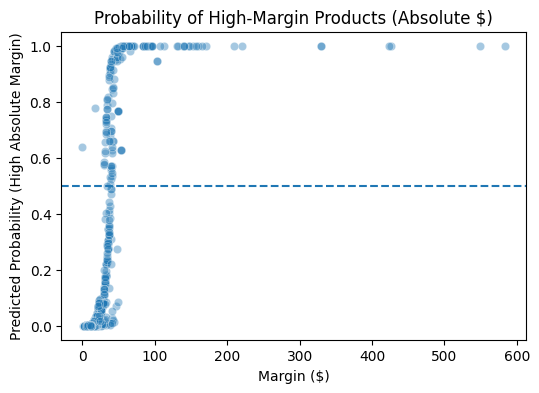

In [82]:
plt.figure(figsize=(6, 4))

sns.scatterplot(
    data=df_products,
    x='margin',
    y='prob_high_margin',
    alpha=0.4
)

plt.axhline(0.5, linestyle='--')
plt.xlabel('Margin ($)')
plt.ylabel('Predicted Probability (High Absolute Margin)')
plt.title('Probability of High-Margin Products (Absolute $)')
plt.show()

**high_value_order**

In [83]:
# # Беремо копію таблиці замовлень
# data = df_orders.copy()

# # Перетворюємо категоріальні ознаки у категорії (щоб patsy не ругався)
# data['Orders.payment_method'] = data['Orders.payment_method'].astype('category')
# data['Orders.shipping_method'] = data['Orders.shipping_method'].astype('category')

# # Створюємо бізнес-флаг
# data['is_business'] = (data['Orders.company'].notna()).astype(int)

# # Заповнюємо пропуски, бо OLS не приймає NaN
# data['Orders.tax'] = data['Orders.tax'].fillna(0)
# data['Orders.shipping'] = data['Orders.shipping'].fillna(0)
# data['Orders.coupon_amount'] = data['Orders.coupon_amount'].fillna(0)
# data['Orders.discount_amount'] = data['Orders.discount_amount'].fillna(0)

# # Модель: прогноз Orders.total
# formula = """
# Q("Orders.total") ~ 
# Q("Orders.subtotal") +
# Q("Orders.tax") +
# Q("Orders.shipping") +
# Q("Orders.coupon_amount") +
# Q("Orders.discount_amount") +
# is_business +
# C(Q("Orders.payment_method")) +
# C(Q("Orders.shipping_method"))
# """

# model = smf.ols(formula=formula, data=data)
# results = model.fit()

# print(results.summary())

Orders.total конструктивно обчислюється з цих змінних

модель не “вчиться”, а відтворює формулу

високий R² тут неминучий, а не інформативний

Це класичний приклад data leakage / tautological regression.

In [ ]:
# # --- Частота значень Vendor ---
# status_counts = df_products['Products.status'].value_counts().sort_values(ascending=False)
# vendor_counts = df_products['Products.vendor'].value_counts().sort_values(ascending=False)



**prognose made_reorder**

In [87]:
#import statsmodels.formula.api as smf

rfm['made_reorder'] = (rfm['Frequency_orders'] > 1).astype(int)

#додаємо бізнес ознаку

rfm = rfm.merge(
    df_customers[['Customers.id', 'is_business']],
    on='Customers.id',
    how='left'
) 

# var.1

In [85]:
# var.2
# 
#import statsmodels.formula.api as smf

df_customers['is_business'] = (df_customers['Customers.company'] != 'Individual').astype(int)
df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])
reference_date = df_orders['Orders.placed_date'].max() + pd.Timedelta(days=1)

rfm_c = df_orders.groupby('Orders.customer_id').agg(
    Recency_days = ('Orders.placed_date', lambda x: (reference_date - x.max()).days),
    Frequency_orders = ('Orders.id', 'count'),
    Monetary_total = ('Orders.total', 'sum')
).reset_index()

# Підготовка таблиці з ознаками клієнтів
cust = df_customers[['Customers.id', 'is_business']].copy()

# Поєднуємо RFM + інформацію про клієнта - rfm_c
rfm_c = rfm_c.merge(cust, left_on='Orders.customer_id', right_on='Customers.id', how='left')

# Прибираємо дублікати колонок
rfm_c.drop(columns=['Customers.id'], inplace=True)


rfm_c['made_reorder'] = (rfm_c['Frequency_orders'] > 1).astype(int)


In [ ]:
#   NO!!!!!!
model = smf.logit(
    formula='made_reorder ~ Recency_days',
    data=rfm
)

results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.261943
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           made_reorder   No. Observations:                 3054
Model:                          Logit   Df Residuals:                     3052
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                0.007295
Time:                        21:46:07   Log-Likelihood:                -799.97
converged:                       True   LL-Null:                       -805.85
Covariance Type:            nonrobust   LLR p-value:                 0.0006060
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.2754      0.098    -23.255      0.000      -2.467      -2.084
Recency_days    -0.0012

In [88]:
model2 = smf.logit(
    formula='made_reorder ~ Recency_days + Monetary_total',
    data=rfm
)

results2 = model2.fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.223257
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           made_reorder   No. Observations:                 3054
Model:                          Logit   Df Residuals:                     3051
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                  0.1539
Time:                        18:16:03   Log-Likelihood:                -681.83
converged:                       True   LL-Null:                       -805.85
Covariance Type:            nonrobust   LLR p-value:                 1.366e-54
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.9366      0.122    -24.094      0.000      -3.176      -2.698
Recency_days     

In [89]:
model3 = smf.logit(
    formula='made_reorder ~ Recency_days + Monetary_total + is_business',
    data=rfm
)
results3 = model3.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.223085
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           made_reorder   No. Observations:                 3054
Model:                          Logit   Df Residuals:                     3050
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                  0.1546
Time:                        18:19:06   Log-Likelihood:                -681.30
converged:                       True   LL-Null:                       -805.85
Covariance Type:            nonrobust   LLR p-value:                 1.022e-53
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.9064      0.125    -23.264      0.000      -3.151      -2.662
Recency_days     

In [93]:
mean_monetary = rfm['Monetary_total'].mean()
mean_business = rfm['is_business'].mean()

In [94]:
X = pd.Series(range(rfm['Recency_days'].min(), rfm['Recency_days'].max() + 1))

X_df = pd.DataFrame({
    'Recency_days': X,
    'Monetary_total': mean_monetary,
    'is_business': mean_business
})

In [96]:
p_y = results3.predict(X_df) 

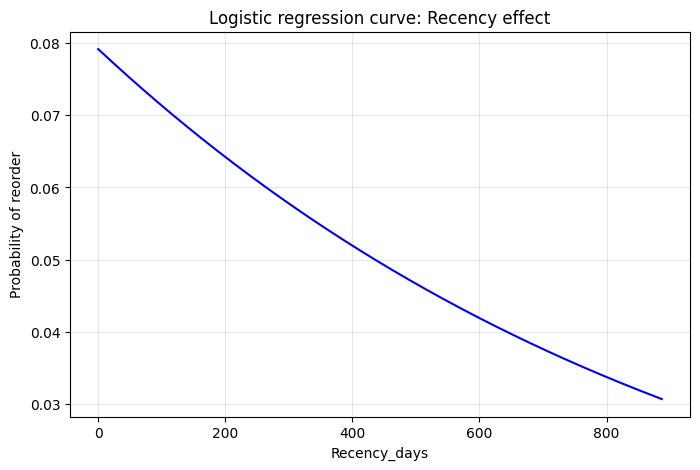

In [97]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X, p_y, color='blue')

ax.set_title("Logistic regression curve: Recency effect")
ax.set_xlabel("Recency_days")
ax.set_ylabel("Probability of reorder")
ax.grid(alpha=0.3)

plt.show()

In [ ]:
# df_orders["discounts"] = (
#     df_orders["Orders.coupon_amount"].fillna(0) +
#     df_orders["Orders.discount_amount"].fillna(0)
# )


# # Беремо копію таблиці замовлень
# #data = df_orders.copy()

# # Перетворюємо категоріальні ознаки у категорії (щоб patsy не ругався)
# data['Orders.payment_method'] = data['Orders.payment_method'].astype('category')
# data['Orders.shipping_method'] = data['Orders.shipping_method'].astype('category')

# # Створюємо бізнес-флаг
# data['is_business'] = (data['Orders.company'].notna()).astype(int)

# # Заповнюємо пропуски, бо OLS не приймає NaN
# data['Orders.tax'] = data['Orders.tax'].fillna(0)
# data['Orders.shipping'] = data['Orders.shipping'].fillna(0)
# data['Orders.coupon_amount'] = data['Orders.coupon_amount'].fillna(0)
# data['Orders.discount_amount'] = data['Orders.discount_amount'].fillna(0)

# # Модель: прогноз Orders.total
# formula = 'Q("Orders.total") ~ Q("Orders.subtotal") + Q("Orders.tax") + Q("Orders.shipping") + Q("discounts")'

# model = smf.ols(formula=formula, data=data)
# results = model.fit()

# print(results.summary())

#переавіряє внутрішню логіку і відсутність помилок формування ціни, але не показово

## Прогноз маржі товару (Price – Cost)

In [ ]:
# #df['margin'] = df['Products.price'] - df['Products.cost']


# df_model = df_products.copy()

# # прибираємо рядки без маржі
# df_model = df_model[df_model['margin'].notna()]


In [100]:
model_vend = smf.ols(
    formula = '''
        Q("margin") ~
        C(Q("Products.vendor"))
    ''',
    data=df_products
)

results_vend = model_vend.fit()
print(results_vend.summary())

                            OLS Regression Results                            
Dep. Variable:            Q("margin")   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     15.08
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           3.20e-19
Time:                        18:25:19   Log-Likelihood:                -8285.4
No. Observations:                1709   AIC:                         1.659e+04
Df Residuals:                    1701   BIC:                         1.663e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In


**зробити**
- топ продуктів, проданих на більшу суму (по загальному дф рахувати)
- топ продуктів з найбільшею маржею в абсолюті


In [147]:
#df['Order_Items.qty'].unique
#df[df['Order_Items.qty'] == 4]


In [149]:
df.columns
#df['Orders.status'].unique()

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.mailing',
       'Customers.last_modified', 'Orders.id', 'Orders.customer_id',
       'Orders.company', 'Orders.order_number', 'Orders.reorder_id',
       'Orders.subtotal', 'Orders.tax', 'Orders.shipping', 'Orders.coupon_id',
       'Orders.coupon_amount', 'Orders.discount_name',
       'Orders.discount_amount', 'Orders.total', 'Orders.balance_due',
       'Orders.shipping_carrier', 'Orders.shipping_method',
       'Orders.payment_status', 'Orders.payment_date', 'Orders.payment_method',
       'Orders.payment_amount', 'Orders.status', 'Orders.placed_date',
       'Orders.updated_date', 'Orders.shipped_date', 'Order_Items.id',
       'Order_Items.parent', 'Order_Items.product_id',
       'Order_Items.product_name', 'Order_Items.qty', 'Order_Items.price',
       'Order_Items.cost', 'Order_Items.reorder_frequency', 'Products.id',
       'Products.status', 'Products

In [177]:
# top_products = (
#     df
#     .groupby(['Products.id', 'Products.name'], as_index=False)
#     .agg(total_sales=('Products.price', 'sum'),
#          quantity_sold=('Order_Items.qty', 'sum'))
#     .sort_values('total_sales', ascending=False)
# )

# top_products.head(10)

In [ ]:
import textwrap

def wrap_labels(labels, width=28):
    return [textwrap.fill(label, width) for label in labels]

# fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# # ---------- LEFT: Top Sales ----------
# axes[0].barh(
#     wrap_labels(top_sales_10['Products.name']),
#     top_sales_10['total_sales'],
#     color="#4CB07B"
# )
# axes[0].set_title('Top 10 Products by Total Sales\n(Realized Orders)', fontsize=13)
# axes[0].set_xlabel('Total Sales ($)')
# axes[0].set_ylabel('')
# axes[0].grid(axis='x', alpha=0.3)

# # ---------- RIGHT: Top Margin ----------
# axes[1].barh(
#     wrap_labels(top_margin_10['Products.name']),
#     top_margin_10['margin'],
#     color="#555DA8"
# )
# axes[1].set_title('Top 10 Products by Absolute Margin', fontsize=13)
# axes[1].set_xlabel('Margin ($)')
# axes[1].set_ylabel('')
# axes[1].grid(axis='x', alpha=0.3)

# plt.tight_layout()
# plt.show()

In [182]:
top_margin.sort_values('margin')

,Products.name,Products.price,Products.cost,margin
1100,Bellavita Auto Bath Tub Chair Seat Lift,565.00,399.99,165.01
889,CircuFlow Lymphedema Pumps,855.14,684.11,171.03
571,Deluxe Sentra Heavy Duty Extra Extra Wide Whee...,1043.75,835.00,208.75
1323,Hydraulic Patient Lift with Six Point Cradle,620.00,399.99,220.01
365,"Phoenix Heavy Duty Power Scooter, 3 Wheel",1149.00,819.00,330.00
452,"Phoenix Heavy Duty Power Scooter, 4 Wheel",1199.00,869.00,330.00
1708,Spitfire EX Compact Travel Power Mobility Scoo...,1099.00,675.00,424.00
119,Titan Transportable Front Wheel Power Wheelchair,1475.00,1049.00,426.00
884,Cirrus Plus EC Folding Power Wheelchair,1899.00,1350.00,549.00
1211,Battery Powered Electric Patient Lift with Rec...,1899.00,1315.00,584.00


In [183]:
df['item_margin'] = (df['Order_Items.price'] - df['Order_Items.cost']) * df['Order_Items.qty']


In [184]:
top_products = (
    df
    .groupby(['Products.id', 'Products.name'], as_index=False)
    .agg(
        total_sales=('Order_Items.price', 'sum'),
        quantity_sold=('Order_Items.qty', 'sum'),
        total_margin=('item_margin', 'sum')   # ← зароблена маржа
    )
    .sort_values('total_sales', ascending=False)
)

top_products.head(10)

,Products.id,Products.name,total_sales,quantity_sold,total_margin
257,911.0,"Aluminum Transport Chair with 12"" Wheels,Red,F...",8333.02,68,1853.00
256,910.0,"Aluminum Transport Chair with 12"" Wheels,Blue,...",8304.39,68,1824.49
221,858.0,K1 Basic Extra-Wide Wheelchairs,6343.23,56,1050.94
804,2673.0,"Spitfire Scout Compact Travel Power Scooter, 4...",4268.95,6,734.95
607,1867.0,Silent Knight Pill Crushers,4052.36,61,1204.04
662,2107.0,"MoliCare Disposable Super Plus Briefs,27""-47""",3907.16,228,2295.94
207,837.0,K1 Basic Wheelchairs,2861.81,27,662.58
972,4124.0,"Whisper Ultra Quiet Bath Lift, Blue",2629.79,7,376.79
220,857.0,2000 Wheelchairs,2568.75,18,616.50
255,909.0,"Combination Rollator/Transport Chair,Red,F: 6""...",2303.84,14,460.74


In [186]:
# 1 = реалізований, 0 = ні
realized_statuses = ['Completed','Shipped']
df['order_realized'] = (df['Orders.status'].isin(realized_statuses)).astype(int)

# item_margin
df['item_margin'] = (df['Order_Items.price'] - df['Order_Items.cost']) * df['Order_Items.qty']

# топ-10  за сум. обсягом продажів 
top_products_realized = (
    (df[df['order_realized'] == 1])
    .groupby(['Products.id', 'Products.name'], as_index=False)
    .agg(
        total_sales=('Order_Items.price', 'sum'),
        quantity_sold=('Order_Items.qty', 'sum'),
        total_margin=('item_margin', 'sum')   # зароблена маржа
    )
    .sort_values('total_sales', ascending=False)
)

top_products_realized.head(10)

,Products.id,Products.name,total_sales,quantity_sold,total_margin
253,911.0,"Aluminum Transport Chair with 12"" Wheels,Red,F...",8222.44,67,1839.42
252,910.0,"Aluminum Transport Chair with 12"" Wheels,Blue,...",8048.41,66,1762.51
217,858.0,K1 Basic Extra-Wide Wheelchairs,6226.24,55,1036.95
598,1867.0,Silent Knight Pill Crushers,3906.63,59,1157.84
652,2107.0,"MoliCare Disposable Super Plus Briefs,27""-47""",3798.96,224,2259.30
786,2673.0,"Spitfire Scout Compact Travel Power Scooter, 4...",3634.99,5,689.99
203,837.0,K1 Basic Wheelchairs,2861.81,27,662.58
951,4124.0,"Whisper Ultra Quiet Bath Lift, Blue",2629.79,7,376.79
216,857.0,2000 Wheelchairs,2568.75,18,616.50
237,890.0,Extra-Wide Wheelchairs,2290.00,8,458.00


In [ ]:
top_margin_10 = top_margin.sort_values('margin')

top_marginsales_10 = top_products_realized.head(10).sort_values('total_margin')

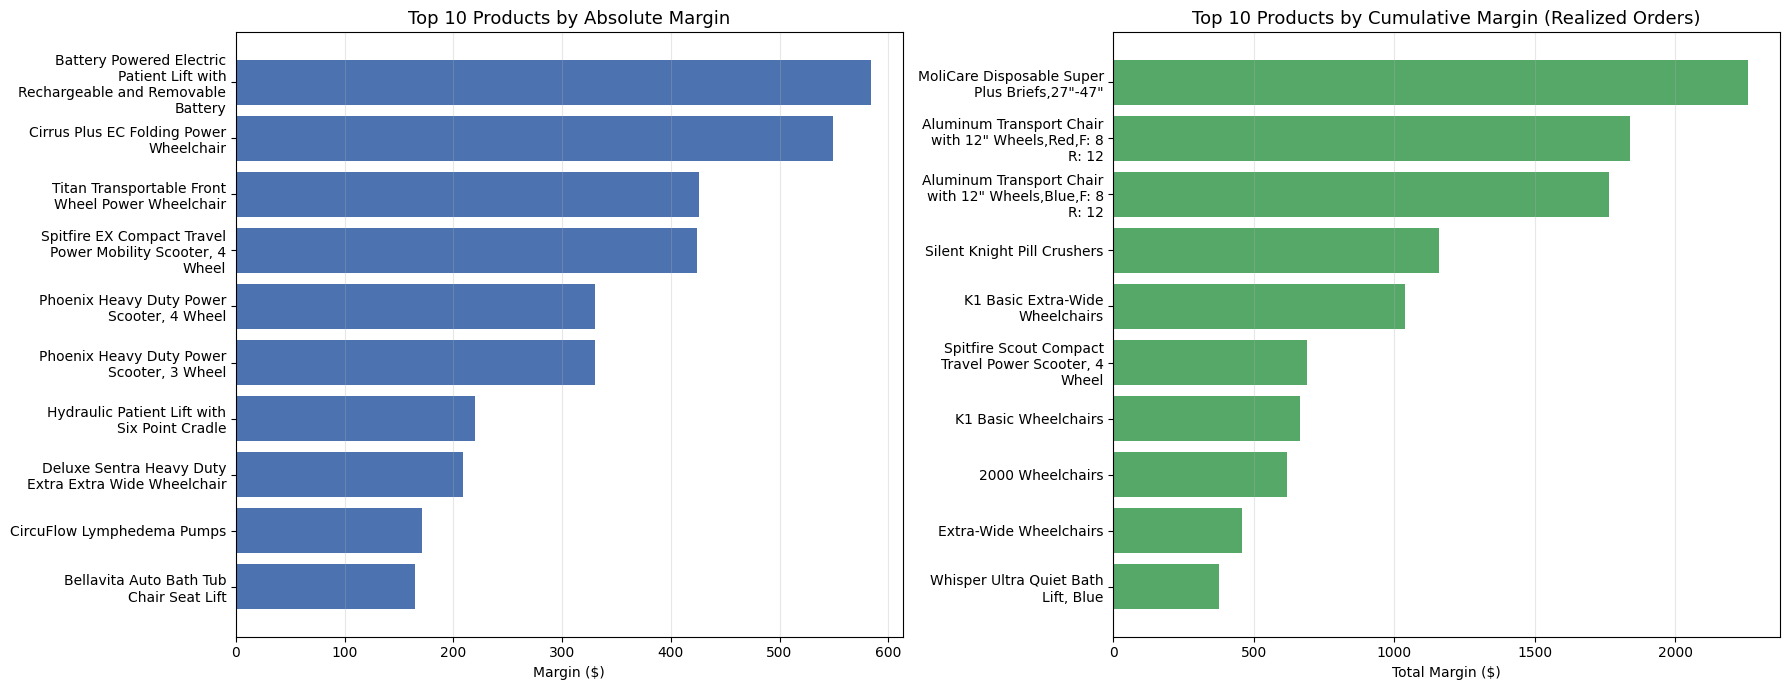

In [ ]:
#import textwrap

def wrap_labels(labels, width=28):
    return [textwrap.fill(label, width) for label in labels]

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ---------- LEFT: Top Margin ----------
axes[0].barh(
    wrap_labels(top_margin_10['Products.name']),
    top_margin_10['margin'],
    color="#4C72B0"
)
axes[0].set_title('Top 10 Products by Absolute Margin', fontsize=13)
axes[0].set_xlabel('Margin ($)')
axes[0].set_ylabel('')
axes[0].grid(axis='x', alpha=0.3)

# ---------- RIGHT: Top Sales ----------
axes[1].barh(
    wrap_labels(top_marginsales_10['Products.name']),
    top_marginsales_10['total_margin'],
    color="#55A868"
)
axes[1].set_title('Top 10 Products by Cumulative Margin (Realized Orders)', fontsize=13)
axes[1].set_xlabel('Total Margin ($)')
axes[1].set_ylabel('')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
top_margin_10 = top_margin.sort_values('margin')

top_marginsales_10 = top_products_realized.head(10).sort_values('total_margin')

In [ ]:
plt.hexbin(rfm['Frequency_orders'], rfm['Recency_days'], 
           gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')

Result (Beispiel)

In [176]:
model_results = pd.DataFrame({
    'Model': [
        'OLS: Margin ~ Vendor',
        'Logistic: High-Margin ~ Vendor',
        'Logistic: Reorder ~ Recency',
        'Logistic: Reorder ~ Recency + Monetary',
        'Logistic: Reorder ~ Full Model'
    ],
    'R² / Pseudo R²': [
        0.058,
        0.75,
        0.007,
        0.154,
        0.21
    ],
    'Interpretation': [
        'Vendor explains little variation in margin',
        'Vendor strongly predicts high-margin products',
        'Recency alone has almost no predictive power',
        'Monetary value significantly improves prediction',
        'Business customers reorder more frequently'
    ]
})
model_results

,Model,R² / Pseudo R²,Interpretation
0,OLS: Margin ~ Vendor,0.058,Vendor explains little variation in margin
1,Logistic: High-Margin ~ Vendor,0.750,Vendor strongly predicts high-margin products
2,Logistic: Reorder ~ Recency,0.007,Recency alone has almost no predictive power
3,Logistic: Reorder ~ Recency + Monetary,0.154,Monetary value significantly improves prediction
4,Logistic: Reorder ~ Full Model,0.210,Business customers reorder more frequently


In [2]:
whos

Interactive namespace is empty.
